### Montar Drive

In [1]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importaciones necesarias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

### Cargar dataset final

In [3]:
# Cargar el archivo CSV desde la ruta en Google Drive
df_socieconomico_final = pd.read_csv('/content/drive/MyDrive/analytics_data_proyect/CSV_finales/df_socieconomico_final.csv')

df_violencia_final = pd.read_csv('/content/drive/MyDrive/analytics_data_proyect/CSV_finales/df_violencia_final.csv')

# Revisar forma de df
print(df_socieconomico_final.shape)
df_violencia_final.shape

(42, 25)


(42, 10)

In [4]:
df_socieconomico_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   poblacion                     42 non-null     float64
 1   ha_under_illegal_explotation  42 non-null     float64
 2   ha_condicionada_upra          42 non-null     float64
 3   ha_no_condicionada_upra       42 non-null     float64
 4   desempleo_cens_2018           42 non-null     float64
 5   tasa_alfab_cens_2018          42 non-null     float64
 6   porc_est_1_cens_2018          42 non-null     float64
 7   porc_est_2_cens_2018          42 non-null     float64
 8   cobertura_neta_mined          42 non-null     float64
 9   desercion_mined               42 non-null     float64
 10  aprobacion_mined              42 non-null     float64
 11  tasa_mort_general_minsal      42 non-null     float64
 12  tasa_mort_ninez_minsal        42 non-null     float64
 13  porc_ba

In [5]:
df_violencia_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   armas_confis_polinal_tasa            42 non-null     float64
 1   indice_criminalidad_general_tasa     42 non-null     float64
 2   indice_narcotrafico_tasa             42 non-null     float64
 3   total_reclam_rest_tierr_minagr_tasa  42 non-null     float64
 4   vict_fuerza_pub_mindef_tasa          42 non-null     float64
 5   vict_por_declarac_uv_tasa            42 non-null     float64
 6   codigo_dane                          42 non-null     int64  
 7   geometria_mpio                       42 non-null     object 
 8   geometria_cabecera                   42 non-null     object 
 9   nombre_municipio                     42 non-null     object 
dtypes: float64(6), int64(1), object(3)
memory usage: 3.4+ KB


In [6]:
var_socioeconomicas = ['poblacion',
 'ha_under_illegal_explotation',
 'ha_condicionada_upra',
 'ha_no_condicionada_upra',
 'desempleo_cens_2018',
 'tasa_alfab_cens_2018',
 'porc_est_1_cens_2018',
 'porc_est_2_cens_2018',
 'cobertura_neta_mined',
 'desercion_mined',
 'aprobacion_mined',
 'tasa_mort_general_minsal',
 'tasa_mort_ninez_minsal',
 'porc_bajo_peso_nacer_minsal',
 'per_ipm_sisben',
 'per_haci_critico_sisben',
 'viviendas_sisbenizados',
 'atencion_inf_prescolar',
 'tasa_afiliacion_salud',
 'indice_condiciones_vivienda',
 'ha_coca_cultivada_minjust']

In [7]:
var_violencia = ['armas_confis_polinal_tasa',
 'indice_criminalidad_general_tasa',
 'indice_narcotrafico_tasa',
 'total_reclam_rest_tierr_minagr_tasa',
 'vict_fuerza_pub_mindef_tasa',
 'vict_por_declarac_uv_tasa']

In [8]:
df_socieconomico_final[var_socioeconomicas].head(2)

,poblacion,ha_under_illegal_explotation,ha_condicionada_upra,ha_no_condicionada_upra,desempleo_cens_2018,tasa_alfab_cens_2018,porc_est_1_cens_2018,porc_est_2_cens_2018,cobertura_neta_mined,desercion_mined,...,tasa_mort_general_minsal,tasa_mort_ninez_minsal,porc_bajo_peso_nacer_minsal,per_ipm_sisben,per_haci_critico_sisben,viviendas_sisbenizados,atencion_inf_prescolar,tasa_afiliacion_salud,indice_condiciones_vivienda,ha_coca_cultivada_minjust
0,339454.0,0.0,39271.620123,0.000012,13.033406,0.885963,0.239353,0.227690,106.12,2.96,...,9.309414,11.758819,10.208933,2277.0,1288.0,2519.0,8093,0.956286,0.754350,0.0
1,19450.0,0.0,11032.637007,7944.565249,7.253784,0.798221,0.527589,0.001839,60.58,4.73,...,4.511195,0.000000,2.631579,4424.0,70.0,2243.0,593,0.807506,0.123537,0.0


In [9]:
df_violencia_final[var_violencia].head(2)

,armas_confis_polinal_tasa,indice_criminalidad_general_tasa,indice_narcotrafico_tasa,total_reclam_rest_tierr_minagr_tasa,vict_fuerza_pub_mindef_tasa,vict_por_declarac_uv_tasa
0,19.207315,208.098888,629.315303,13.786846,0.500804,6123.303894
1,1.542416,163.496144,0.021594,55.012853,0.514139,1881.233933


### Clusterizar el dataset con las variables sobre violencia

- Escalado de los datos

In [10]:
# Escalado de variables de violencia
scaler_violencia = StandardScaler()
df_violencia_scaled = df_violencia_final.copy()
df_violencia_scaled[var_violencia] = scaler_violencia.fit_transform(df_violencia_final[var_violencia])

In [11]:
# Datos antes de escalarlos
df_violencia_final.head(3)

,armas_confis_polinal_tasa,indice_criminalidad_general_tasa,indice_narcotrafico_tasa,total_reclam_rest_tierr_minagr_tasa,vict_fuerza_pub_mindef_tasa,vict_por_declarac_uv_tasa,codigo_dane,geometria_mpio,geometria_cabecera,nombre_municipio
0,19.207315,208.098888,629.315303,13.786846,0.500804,6123.303894,19001,0103000000010000007B190000386BD2FB732F53C0803D...,010100000093FFAB40542653C0F9A91EBAF9AD0340,POPAYAN
1,1.542416,163.496144,0.021594,55.012853,0.514139,1881.233933,19022,0103000000010000007D0C000028B1F5B6C03353C00078...,0101000000497A4C70C73653C0F4849E4A229DFE3F,ALMAGUER
2,14.736010,255.903389,5.256802,165.690256,30.550264,8835.855228,19050,0103000000010000008A0900005481358FE25353C080BC...,010100000006F6A404F74F53C0501D2637D50D0240,ARGELIA


In [12]:
# Datos escalados
df_violencia_scaled.head(3)

,armas_confis_polinal_tasa,indice_criminalidad_general_tasa,indice_narcotrafico_tasa,total_reclam_rest_tierr_minagr_tasa,vict_fuerza_pub_mindef_tasa,vict_por_declarac_uv_tasa,codigo_dane,geometria_mpio,geometria_cabecera,nombre_municipio
0,-0.011613,-0.658272,-0.590319,-0.531666,-0.365650,1.394911,19001,0103000000010000007B190000386BD2FB732F53C0803D...,010100000093FFAB40542653C0F9A91EBAF9AD0340,POPAYAN
1,-0.679668,-1.033793,-0.684163,-0.205530,-0.362945,-0.404669,19022,0103000000010000007D0C000028B1F5B6C03353C00078...,0101000000497A4C70C73653C0F4849E4A229DFE3F,ALMAGUER
2,-0.180710,-0.255795,-0.683383,0.670029,5.728880,2.545635,19050,0103000000010000008A0900005481358FE25353C080BC...,010100000006F6A404F74F53C0501D2637D50D0240,ARGELIA


- Dectar anomalias

In [13]:
from sklearn.ensemble import IsolationForest

# Entrenar Isolation Forest con todas las variables
isolation_forest = IsolationForest(random_state=42, contamination=0.05)
isolation_forest.fit(df_violencia_scaled[var_violencia])

# Obtener los puntajes de anomalía con todas las variables
full_scores = isolation_forest.decision_function(df_violencia_scaled[var_violencia])

# Identificar las anomalías
predictions = isolation_forest.fit_predict(df_violencia_scaled[var_violencia])
anomaly_mask = predictions == -1
anomalies = df_violencia_scaled[anomaly_mask]

# Crear un diccionario para almacenar la importancia de cada variable
feature_importance = {}

# Calcular el cambio en el puntaje de anomalía al eliminar cada variable individualmente
for variable in var_violencia:
    # Crear un dataframe sin la variable actual
    subset = df_violencia_scaled[var_violencia].drop(columns=[variable])

    # Re-entrenar el Isolation Forest con el subconjunto de variables
    isolation_forest.fit(subset)

    # Obtener los puntajes de anomalía con el subconjunto de variables
    subset_scores = isolation_forest.decision_function(subset)

    # Calcular la importancia como la diferencia promedio entre los puntajes completos y los puntajes sin la variable
    importance = np.mean(np.abs(full_scores - subset_scores))
    feature_importance[variable] = importance

# Ordenar la importancia de las variables de mayor a menor
feature_importance = dict(sorted(feature_importance.items(), key=lambda item: item[1], reverse=True))

# Mostrar los municipios considerados como anómalos
print("\nMunicipios detectados como anomalías:")
anomalies[['nombre_municipio']+ var_violencia]


Municipios detectados como anomalías:


,nombre_municipio,armas_confis_polinal_tasa,indice_criminalidad_general_tasa,indice_narcotrafico_tasa,total_reclam_rest_tierr_minagr_tasa,vict_fuerza_pub_mindef_tasa,vict_por_declarac_uv_tasa
2,ARGELIA,-0.180710,-0.255795,-0.683383,0.670029,5.728880,2.545635
27,PUERTO TEJADA,4.943214,1.479397,0.110663,-0.585165,0.084236,-0.872649
32,SANTA ROSA,-0.737999,1.844848,-0.152546,4.942780,-0.107553,0.642662


In [14]:
# Mostrar la importancia de las variables
print("Importancia de variables en la detección de anomalías:")
for variable, importance in feature_importance.items():
    print(f"{variable}: {importance:.4f}")

Importancia de variables en la detección de anomalías:
total_reclam_rest_tierr_minagr_tasa: 0.0293
vict_fuerza_pub_mindef_tasa: 0.0255
armas_confis_polinal_tasa: 0.0221
indice_narcotrafico_tasa: 0.0173
vict_por_declarac_uv_tasa: 0.0165
indice_criminalidad_general_tasa: 0.0121


### visualizar a partir de los resultados de las anomalias


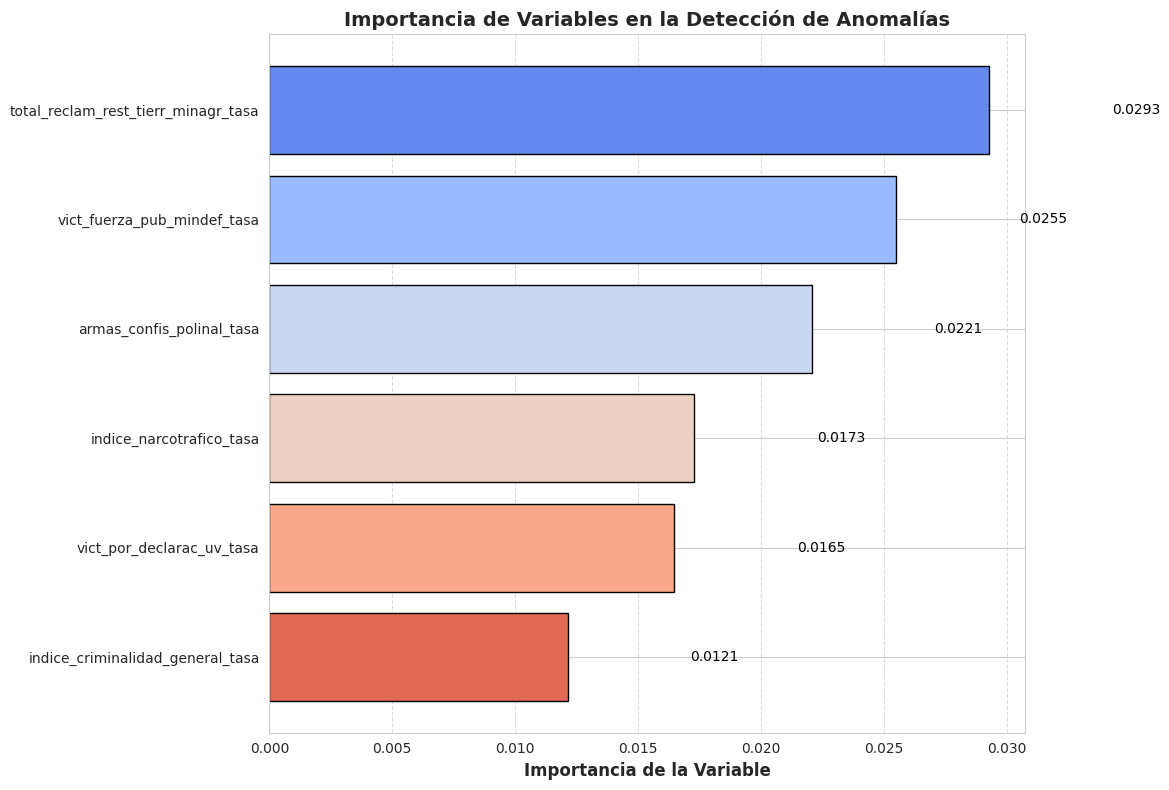

In [15]:
# Crear el gráfico de barras horizontal con estilo mejorado
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Generar colores graduales
colors = sns.color_palette("coolwarm", len(feature_importance))

# Graficar la importancia de las variables en orden descendente
bars = plt.barh(list(feature_importance.keys()), list(feature_importance.values()), color=colors, edgecolor='black')

# Etiquetas de valor en cada barra
for bar in bars:
    plt.text(
        bar.get_width() + 0.005,  # Posición horizontal
        bar.get_y() + bar.get_height() / 2,  # Posición vertical
        f'{bar.get_width():.4f}',  # Formato del valor
        va='center',  # Alinear verticalmente al centro
        ha='left',  # Alinear horizontalmente a la izquierda de la barra
        color='black',
        fontsize=10
    )

# Configuración adicional para estética
plt.xlabel("Importancia de la Variable", fontsize=12, weight='bold')
plt.title("Importancia de Variables en la Detección de Anomalías", fontsize=14, weight='bold')
plt.gca().invert_yaxis()  # Invertir el eje Y para que la variable más importante esté arriba
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()  # Ajustar el espacio para evitar recortes
plt.show()

- Visualizar en mapa los municipios anomalos

In [16]:
import geopandas as gpd
from shapely import wkb
from shapely.geometry import Point

# Convertir a un GeoDataFrame
geo_violencia = gpd.GeoDataFrame(df_violencia_final, geometry=gpd.GeoSeries.from_wkb(df_violencia_final['geometria_mpio']))

In [17]:
# Convertir las cabeceras municipales en geometrías de puntos
geo_violencia['geometria_cabecera'] = gpd.GeoSeries.from_wkb(geo_violencia['geometria_cabecera'])

In [18]:
#Definir el sistema de referencia de coordenadas (CRS)
geo_violencia = geo_violencia.set_crs(epsg=4326, inplace=True)

In [19]:
anomalies.head()

,armas_confis_polinal_tasa,indice_criminalidad_general_tasa,indice_narcotrafico_tasa,total_reclam_rest_tierr_minagr_tasa,vict_fuerza_pub_mindef_tasa,vict_por_declarac_uv_tasa,codigo_dane,geometria_mpio,geometria_cabecera,nombre_municipio
2,-0.180710,-0.255795,-0.683383,0.670029,5.728880,2.545635,19050,0103000000010000008A0900005481358FE25353C080BC...,010100000006F6A404F74F53C0501D2637D50D0240,ARGELIA
27,4.943214,1.479397,0.110663,-0.585165,0.084236,-0.872649,19573,0103000000010000007F0A00005C49CDDF631D53C0000A...,010100000069218926B51A53C0D61E1D2FC9DD0940,PUERTO TEJADA
32,-0.737999,1.844848,-0.152546,4.942780,-0.107553,0.642662,19701,0103000000010000001A1B0000D062A1EAD82453C000A4...,010100000032F995F8BB2453C02DCD040A1A3DFB3F,SANTA ROSA


<ipython-input-20-148f7f446a5b>:26: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='upper right')


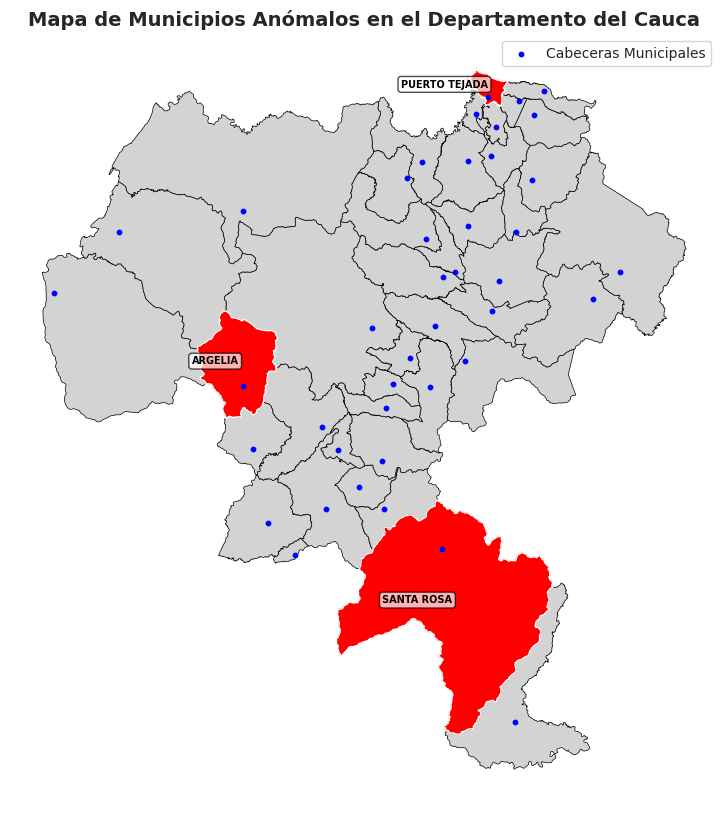

In [20]:
# Convertir la columna de geometría WKB en geometrías válidas, evitando SettingWithCopyWarning
anomalies = anomalies.copy()
anomalies['geometria_mpio'] = anomalies['geometria_mpio'].apply(wkb.loads)

# Crear un GeoDataFrame con las anomalías
anomalies_gdf = gpd.GeoDataFrame(anomalies, geometry='geometria_mpio', crs="EPSG:4326")

# Graficar los municipios anómalos en el mapa del Cauca
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
geo_violencia.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=0.5, label='Municipios del Cauca')
anomalies_gdf.plot(ax=ax, color='red', markersize=100, label='Municipios Anómalos', zorder=5)

# Añadir etiquetas con el nombre de cada municipio anómalo usando el centroide y zorder alto
for idx, row in anomalies_gdf.iterrows():
    centroid = row['geometria_mpio'].centroid
    plt.text(centroid.x, centroid.y, row['nombre_municipio'],
             fontsize=7, ha='right', color='black', weight='bold',
             bbox=dict(facecolor='white', edgecolor='black', alpha=0.7, boxstyle="round,pad=0.3"),
             zorder=10)

# Añadir cabeceras municipales
geo_violencia.set_geometry('geometria_cabecera').plot(ax=ax, color='blue', markersize=10, label='Cabeceras Municipales', zorder=6)

# Añadir título y leyenda
plt.title("Mapa de Municipios Anómalos en el Departamento del Cauca", fontsize=14, weight='bold')
plt.legend(loc='upper right')
plt.axis('off')
plt.show()

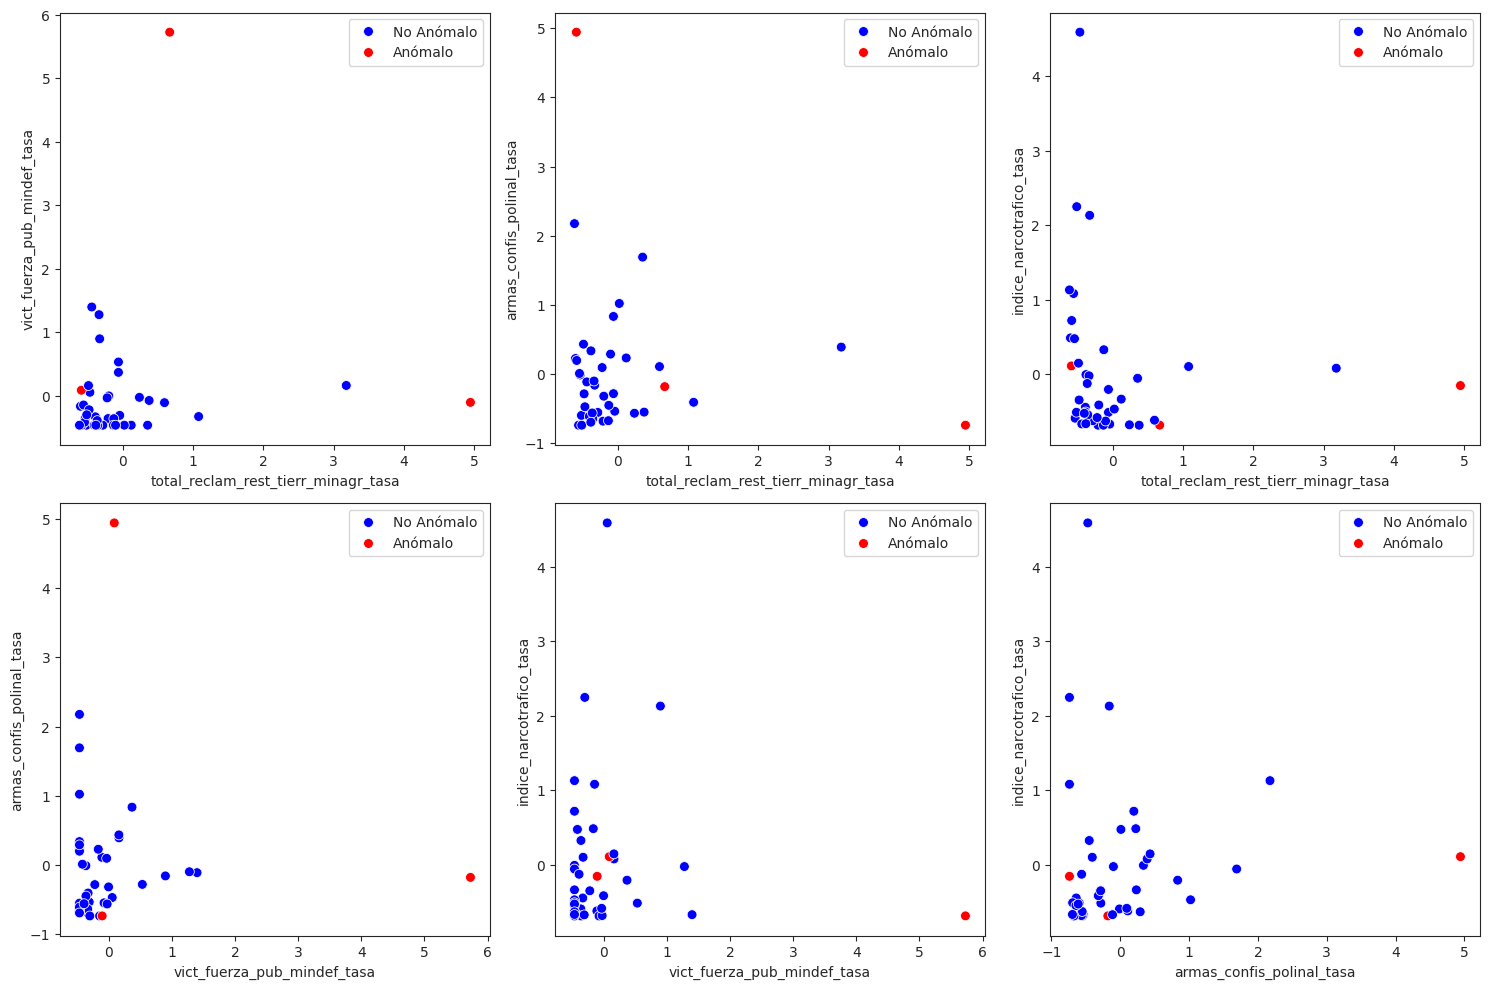

In [21]:
# Crear un dataframe donde se añada la columna de predicciones de anomalías (1 = anómalo, 0 = normal)
df_violencia_scaled['is_anomalous'] = (predictions == -1).astype(int)

# Número de pares de variables a visualizar
num_pairs = 6
top_vars = list(feature_importance.keys())[:4]  # Toma las 4 variables más importantes

# Crear combinaciones de pares de variables (sin repetición)
from itertools import combinations
pairs = list(combinations(top_vars, 2))[:num_pairs]  # Limitar a `num_pairs` pares

# Configurar la cuadrícula
ncols = 3  # Número de gráficos por fila
nrows = (len(pairs) + ncols - 1) // ncols  # Calcular número de filas

sns.set_style("ticks")
plt.figure(figsize=(15, 5 * nrows))

# Graficar cada par de variables en la cuadrícula
for idx, (var1, var2) in enumerate(pairs, start=1):
    plt.subplot(nrows, ncols, idx)
    sns.scatterplot(
        x=var1, y=var2, data=df_violencia_scaled, hue='is_anomalous',
        palette={0: "blue", 1: "red"}, s=50
    )
    plt.xlabel(var1)
    plt.ylabel(var2)
    #plt.title(f"Distribución de Anomalías por pares de variables")

    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, ['No Anómalo', 'Anómalo'])

plt.tight_layout()
plt.show()

## Clusterizar municipios con variables de violencia
### - Con anomalías, sin PCA y número fijo de cluster en 3

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Seleccionar las variables de violencia para el clustering
X_violencia = df_violencia_scaled[var_violencia]

# Definir el modelo K-means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Entrenar el modelo
kmeans.fit(X_violencia)

# Asignar las etiquetas de los clusters al dataset
df_violencia_scaled['cluster'] = kmeans.labels_

# Mostrar la cantidad de municipios en cada cluster
print("Conteo de municipios por cluster:")
print(df_violencia_scaled['cluster'].value_counts())

Conteo de municipios por cluster:
cluster
1    32
0     9
2     1
Name: count, dtype: int64


- Lista de municipios por cluster

In [23]:
# Agrupar por 'cluster' y crear una lista de municipios en cada cluster
municipios_por_cluster = df_violencia_scaled.groupby('cluster')['nombre_municipio'].agg(list)

# Calcular el conteo de municipios por cluster
conteo_municipios = df_violencia_scaled['cluster'].value_counts().sort_index()

# Crear un DataFrame con los resultados
cluster_summary = pd.DataFrame({
    'municipios_en_cluster': municipios_por_cluster,
    'cantidad_municipios': conteo_municipios
})
cluster_summary

,municipios_en_cluster,cantidad_municipios
cluster,,
0,"[POPAYAN, CALOTO, CORINTO, GUAPI, JAMBALO, LOP...",9
1,"[ALMAGUER, BALBOA, BOLIVAR, BUENOS AIRES, CAJI...",32
2,[ARGELIA],1


- Matriz de centroides

In [24]:
# Convertir los centroides en un DataFrame con los nombres de las variables
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns=var_violencia)
print("Centroides de los clusters:")
centroids_df

Centroides de los clusters:


,armas_confis_polinal_tasa,indice_criminalidad_general_tasa,indice_narcotrafico_tasa,total_reclam_rest_tierr_minagr_tasa,vict_fuerza_pub_mindef_tasa,vict_por_declarac_uv_tasa
0,-0.321563,-0.508071,1.070229,-0.397539,0.019675,1.318455
1,0.096087,0.150889,-0.279646,0.090870,-0.184561,-0.450367
2,-0.180710,-0.255795,-0.683383,0.670029,5.728880,2.545635


- Análisis descriptivo de los clusters

In [25]:
#  Estadisticas descriptivas de cada cluster
cluster_mean_std = df_violencia_scaled.groupby('cluster')[var_violencia].agg(['mean', 'median', 'std'])
print("Media, mediana y desviación estándar de variables de violencia por cluster:")
cluster_mean_std

Media, mediana y desviación estándar de variables de violencia por cluster:


armas_confis_polinal_tasa                      \
                             mean    median       std   
cluster                                                 
0                       -0.321563 -0.450758  0.362030   
1                        0.096087 -0.283536  1.131553   
2                       -0.180710 -0.180710       NaN   

        indice_criminalidad_general_tasa                      \
                                    mean    median       std   
cluster                                                        
0                              -0.508071 -0.672092  0.786174   
1                               0.150889  0.018599  1.046318   
2                              -0.255795 -0.255795       NaN   

        indice_narcotrafico_tasa                      \
                            mean    median       std   
cluster                                                
0                       1.070229  0.327759  1.657107   
1                      -0.279646 -0.487446  0.466766   
2                      -0.683383 -0.683383       NaN   

        total_reclam_rest_tierr_minagr_tasa                      \
                                       mean    median       std   
cluster                                                           
0                                 -0.397539 -0.378001  0.134693   
1                                  0.090870 -0.212143  1.131932   
2                                  0.670029  0.670029       NaN   

        vict_fuerza_pub_mindef_tasa                      \
                               mean    median       std   
cluster                                                   
0                          0.019675 -0.303510  0.630393   
1                         -0.184561 -0.333035  0.397868   
2                          5.728880  5.728880       NaN   

        vict_por_declarac_uv_tasa                      
                             mean    median       std  
cluster                                                
0                        1.318455  1.491716  0.740902  
1                       -0.450367 -0.546227  0.538600  
2                        2.545635  2.545635       NaN

- Visualización de Tesselation Voroni

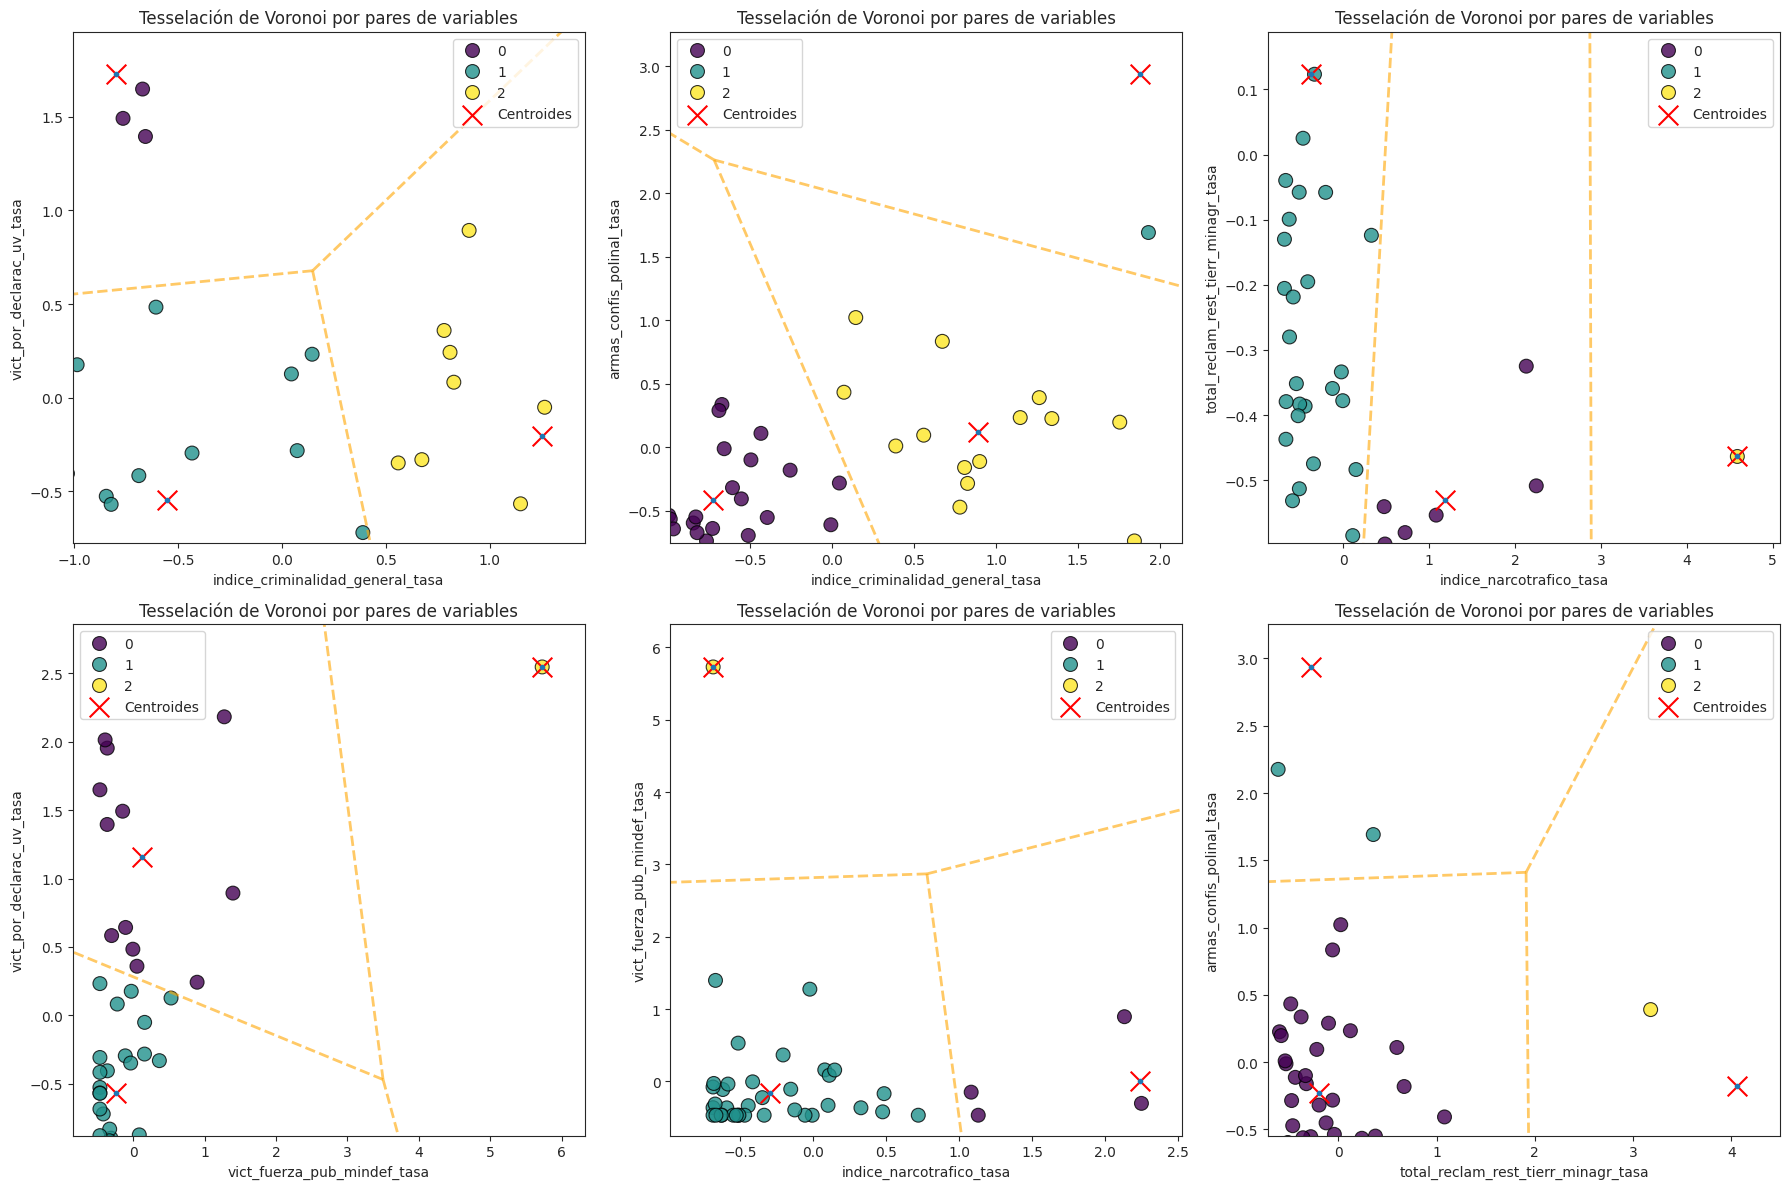

In [26]:
from scipy.spatial import Voronoi, voronoi_plot_2d
# Pares de variables que queremos graficar
variable_pairs = [
    ('indice_criminalidad_general_tasa', 'vict_por_declarac_uv_tasa'),
    ('indice_criminalidad_general_tasa', 'armas_confis_polinal_tasa'),
    ('indice_narcotrafico_tasa', 'total_reclam_rest_tierr_minagr_tasa'),
    ('vict_fuerza_pub_mindef_tasa', 'vict_por_declarac_uv_tasa'),
    ('indice_narcotrafico_tasa', 'vict_fuerza_pub_mindef_tasa'),
    ('total_reclam_rest_tierr_minagr_tasa', 'armas_confis_polinal_tasa')
]

# Crear figura con subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Generar gráficos para cada par de variables
for i, (var1, var2) in enumerate(variable_pairs):
    X_selected = df_violencia_scaled[[var1, var2]]

    # Crear un nuevo modelo K-means para esta iteración sin alterar el original
    kmeans_temp = KMeans(n_clusters=3, random_state=42)
    kmeans_temp.fit(X_selected)
    labels = kmeans_temp.labels_
    centroids = kmeans_temp.cluster_centers_

    # Crear la tesselación de Voronoi
    vor = Voronoi(centroids)

    # Seleccionar el subplot actual
    ax = axes[i // 3, i % 3]
    sns.scatterplot(x=X_selected[var1], y=X_selected[var2], hue=labels, palette='viridis', s=100, alpha=0.8, edgecolor='k', ax=ax)
    ax.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=200, label='Centroides')
    voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='orange', line_width=2, line_alpha=0.6)

    ax.set_xlabel(var1)
    ax.set_ylabel(var2)
    ax.set_title(f'Tesselación de Voronoi por pares de variables')
    ax.legend()

# Ajustar el layout de las gráficas
plt.tight_layout()
plt.show()

- Gráficos de boxplot de cada variable en cada cluster

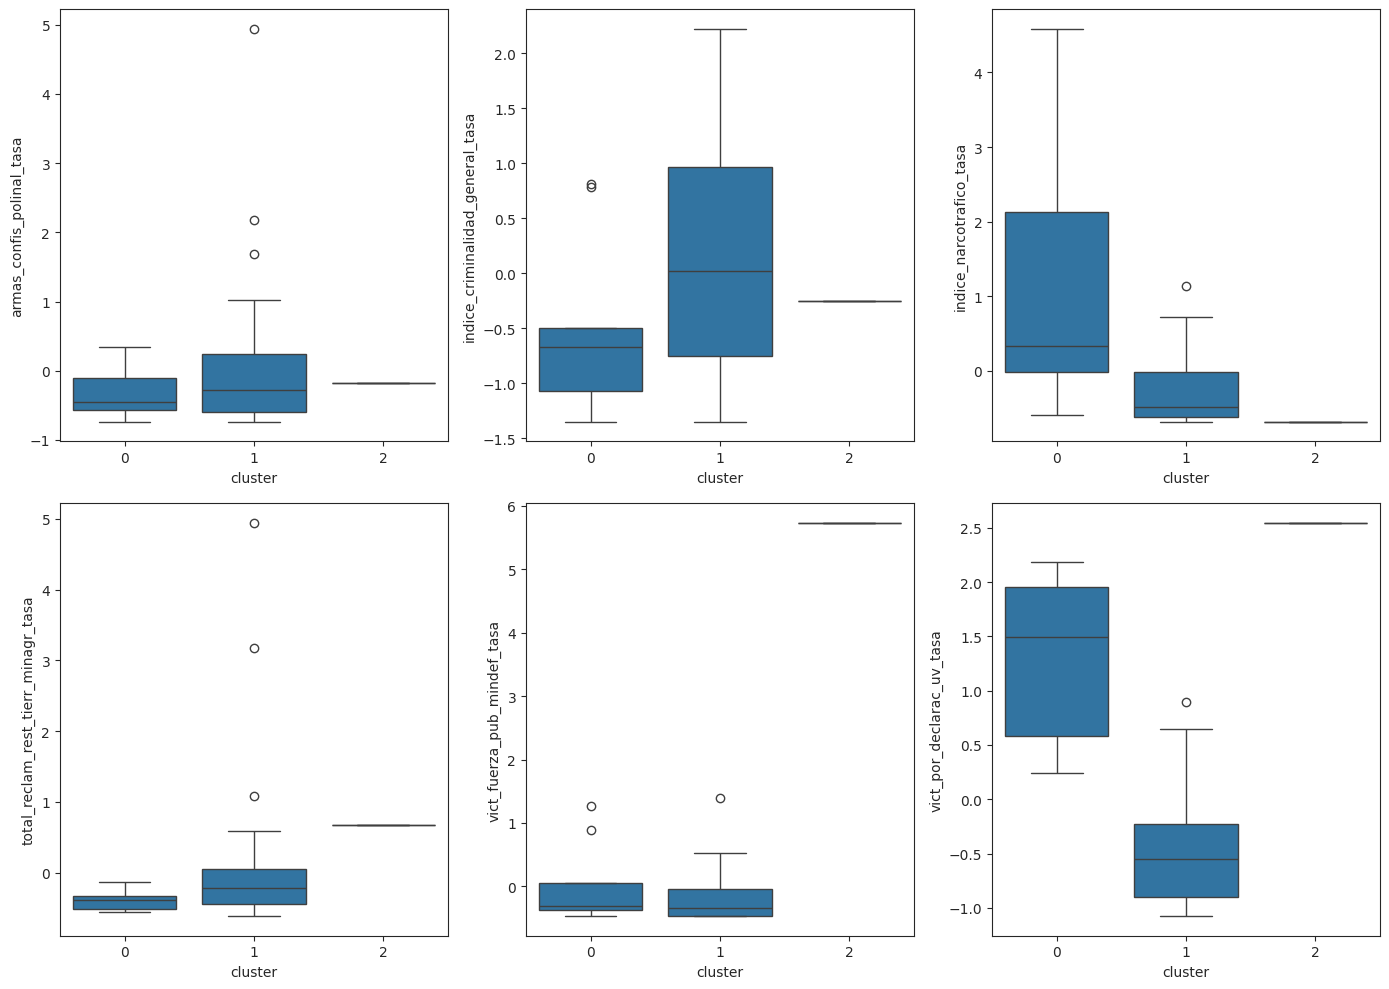

In [27]:
# Crear gráficos de boxplot para cada variable de violencia según el cluster
plt.figure(figsize=(14, 10))
for i, var in enumerate(var_violencia):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='cluster', y=var, data=df_violencia_scaled)
    #plt.title(f"Distribución de {var} por cluster")
plt.tight_layout()
plt.show()

- Mapa que muestra la distribución de los municipios del Cauca según los clústeres identificados

<ipython-input-28-5bdbea3b7546>:26: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='upper right')


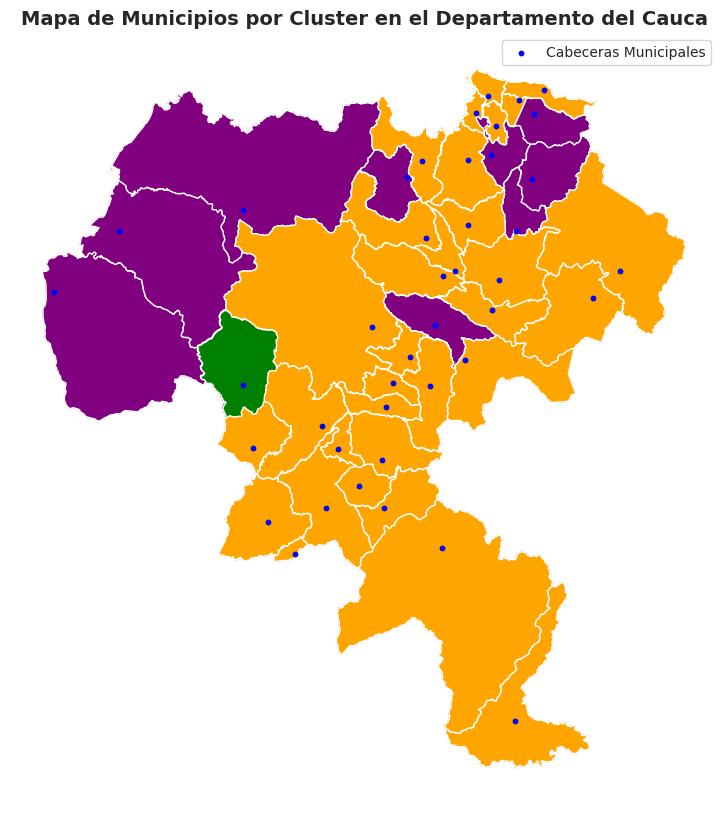

In [28]:
# Crear una copia de df_violencia_scaled con las geometrías válidas
df_violencia_scaled = df_violencia_scaled.copy()
df_violencia_scaled['geometria_mpio'] = df_violencia_scaled['geometria_mpio'].apply(wkb.loads)

# Convertir df_violencia_scaled a un GeoDataFrame
cluster_gdf = gpd.GeoDataFrame(df_violencia_scaled, geometry='geometria_mpio', crs="EPSG:4326")

# Colores para cada cluster
colors = {0: 'purple', 1: 'orange', 2: 'green'}

# Graficar el mapa base del Cauca
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
geo_violencia.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=0.5, label='Municipios del Cauca')

# Graficar los municipios por cluster, asignando un color distinto a cada cluster
for cluster, color in colors.items():
    cluster_gdf[cluster_gdf['cluster'] == cluster].plot(
        ax=ax, color=color, markersize=100, label=f'Cluster {cluster}', zorder=5
    )

# Añadir cabeceras municipales
geo_violencia.set_geometry('geometria_cabecera').plot(ax=ax, color='blue', markersize=10, label='Cabeceras Municipales', zorder=6)

# Añadir título y leyenda
plt.title("Mapa de Municipios por Cluster en el Departamento del Cauca", fontsize=14, weight='bold')
plt.legend(loc='upper right')
plt.axis('off')
plt.show()

- Evaluación de la calidad de la clusterización anterior

In [29]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Calcular el coeficiente de silueta para cada punto
silhouette_vals = silhouette_samples(X_violencia, kmeans.labels_)

# Añadir el coeficiente de silueta al DataFrame original
df_violencia_scaled['silhouette'] = silhouette_vals

# Calcular los coeficientes de silueta promedio
silhouette_by_cluster = df_violencia_scaled.groupby('cluster')['silhouette'].mean()
silho_by_var = X_violencia.apply(lambda col: silhouette_samples(col.values.reshape(-1, 1), kmeans.labels_)).mean()
silhouette_avg = silhouette_score(X_violencia, df_violencia_scaled['cluster'])

# Imprimir los resultados
print(f"Coeficiente de Silueta promedio por cluster:\n{silhouette_by_cluster}")
print(f"\nCoeficiente de silueta promedio por variable:\n{silho_by_var}")
print(f"\nCoeficiente de Silueta promedio para el modelo: {silhouette_avg:.3f}")
print(f"Inercia del modelo: {kmeans.inertia_:.3f}")

Coeficiente de Silueta promedio por cluster:
cluster
0    0.252349
1    0.304148
2    0.000000
Name: silhouette, dtype: float64

Coeficiente de silueta promedio por variable:
armas_confis_polinal_tasa             -0.437475
indice_criminalidad_general_tasa      -0.298720
indice_narcotrafico_tasa              -0.338402
total_reclam_rest_tierr_minagr_tasa   -0.321960
vict_fuerza_pub_mindef_tasa            0.156848
vict_por_declarac_uv_tasa              0.439480
dtype: float64

Coeficiente de Silueta promedio para el modelo: 0.286
Inercia del modelo: 169.681


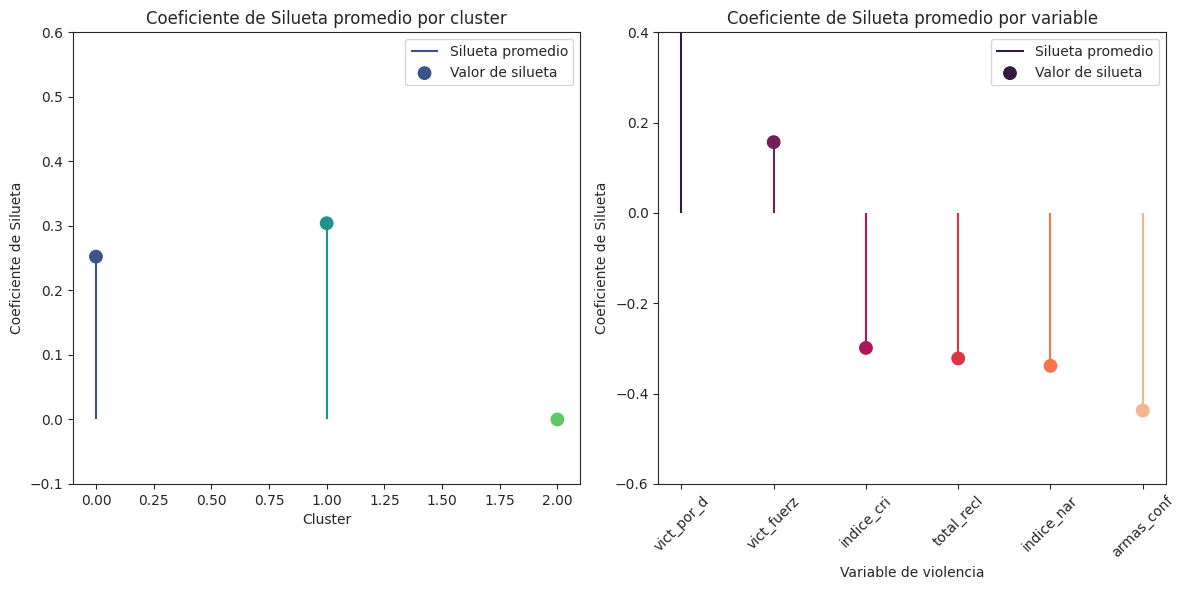

In [30]:
# Colores personalizados para los gráficos
palette_cluster = sns.color_palette("viridis", len(silhouette_by_cluster))
palette_var = sns.color_palette("rocket", len(silho_by_var))

# Ordenar y truncar los nombres de las variables a los primeros 10 caracteres
sorted_vars = silho_by_var.sort_values(ascending=False)
sorted_vars.index = [var[:10] for var in sorted_vars.index]

# Gráfico de silueta promedio por cluster (lollipop)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Silueta promedio por cluster
ax[0].vlines(silhouette_by_cluster.index, 0, silhouette_by_cluster.values, color=palette_cluster, linestyle='-', label='Silueta promedio')
ax[0].scatter(silhouette_by_cluster.index, silhouette_by_cluster.values, color=palette_cluster, s=80, zorder=5, label='Valor de silueta')
ax[0].set_title("Coeficiente de Silueta promedio por cluster")
ax[0].set_xlabel("Cluster")
ax[0].set_ylabel("Coeficiente de Silueta")
ax[0].set_ylim(-0.1, 0.6)
ax[0].legend()

# Silueta promedio por variable (lollipop)
ax[1].vlines(sorted_vars.index, 0, sorted_vars.values, color=palette_var, linestyle='-', label='Silueta promedio')
ax[1].scatter(sorted_vars.index, sorted_vars.values, color=palette_var, s=80, zorder=5, label='Valor de silueta')
ax[1].set_title("Coeficiente de Silueta promedio por variable")
ax[1].set_xlabel("Variable de violencia")
ax[1].set_ylabel("Coeficiente de Silueta")
ax[1].set_ylim(-0.6, 0.4)
ax[1].tick_params(axis='x', rotation=45)
ax[1].legend()

plt.tight_layout()
plt.show()

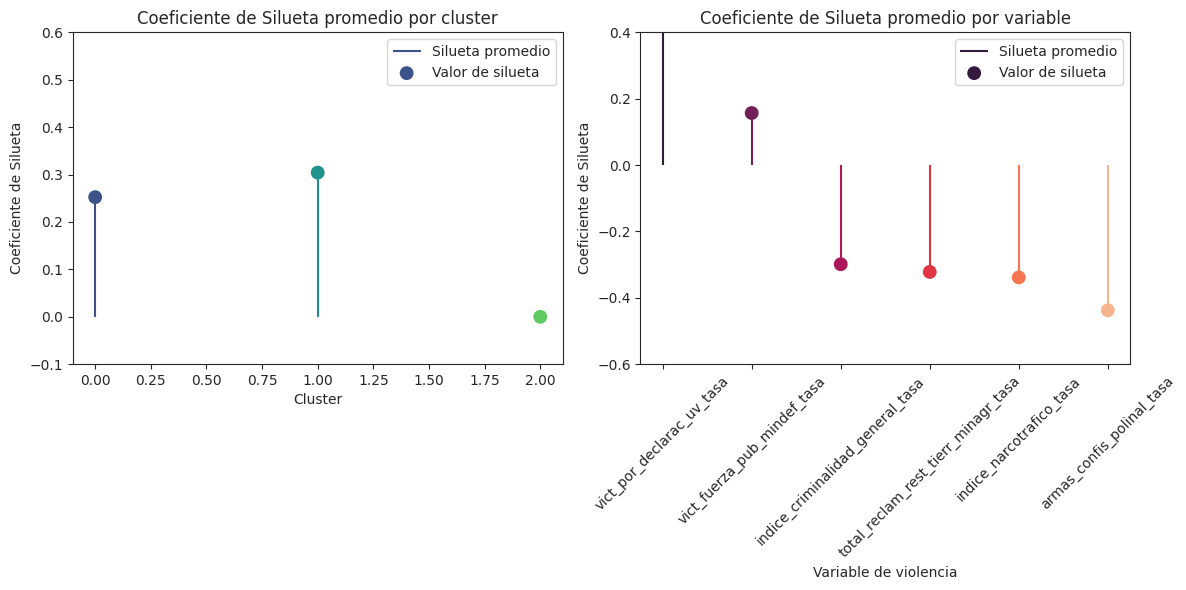

In [31]:
# Colores personalizados para los gráficos
palette_cluster = sns.color_palette("viridis", len(silhouette_by_cluster))
palette_var = sns.color_palette("rocket", len(silho_by_var))

# Gráfico de silueta promedio por cluster (lollipop)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Silueta promedio por cluster
ax[0].vlines(silhouette_by_cluster.index, 0, silhouette_by_cluster.values, color=palette_cluster, linestyle='-', label='Silueta promedio')
ax[0].scatter(silhouette_by_cluster.index, silhouette_by_cluster.values, color=palette_cluster, s=80, zorder=5, label='Valor de silueta')
ax[0].set_title("Coeficiente de Silueta promedio por cluster")
ax[0].set_xlabel("Cluster")
ax[0].set_ylabel("Coeficiente de Silueta")
ax[0].set_ylim(-0.1, 0.6)
ax[0].legend()

# Silueta promedio por variable (lollipop)
sorted_vars = silho_by_var.sort_values(ascending=False)  # Ordenar para mejor visualización
ax[1].vlines(sorted_vars.index, 0, sorted_vars.values, color=palette_var, linestyle='-', label='Silueta promedio')
ax[1].scatter(sorted_vars.index, sorted_vars.values, color=palette_var, s=80, zorder=5, label='Valor de silueta')
ax[1].set_title("Coeficiente de Silueta promedio por variable")
ax[1].set_xlabel("Variable de violencia")
ax[1].set_ylabel("Coeficiente de Silueta")
ax[1].set_ylim(-0.6, 0.4)
ax[1].tick_params(axis='x', rotation=45)
ax[1].legend()

plt.tight_layout()
plt.show()

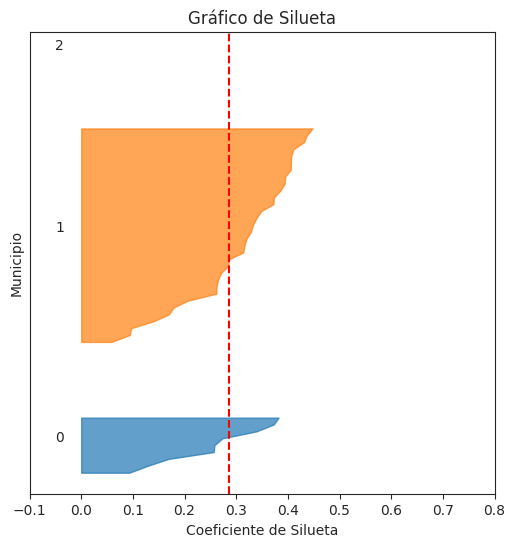

In [32]:
# Crear el gráfico de silueta
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

# Ordenar los valores de silueta por cluster
y_lower = 10
for i in range(3):
    # Obtener los valores de silueta para el cluster i
    ith_cluster_silhouette_vals = silhouette_vals[kmeans.labels_ == i]
    ith_cluster_silhouette_vals.sort()

    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    color = 'C{}'.format(i)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                    0, ith_cluster_silhouette_vals,
                    facecolor=color, edgecolor=color, alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

ax.set_title("Gráfico de Silueta")
ax.set_xlabel("Coeficiente de Silueta")
ax.set_ylabel("Municipio")
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
ax.set_xticks([-0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

plt.show()

###- Clustrizacion con anomalías, con PCA y usando la técnica del codo para optimizar la cantidad de grupos

- Calcular número óptimo de clusters

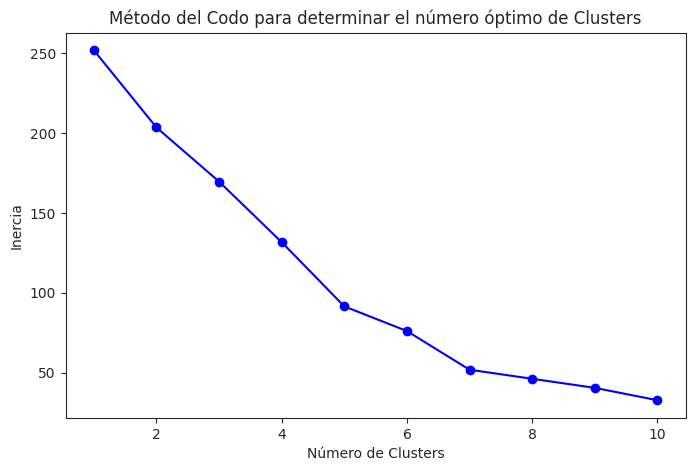

In [33]:
# Definir el rango de clusters a probar
range_n_clusters = range(1, 11)

# Lista para almacenar la inercia de cada modelo
inertias = []

# Entrenar K-means con cada cantidad de clusters y almacenar la inercia
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_violencia)
    inertias.append(kmeans.inertia_)

# Graficar la inercia en función del número de clusters
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertias, marker='o', linestyle='-', color='b')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para determinar el número óptimo de Clusters')
plt.show()

- Reducir dimensionalidad con PCA

In [34]:
from sklearn.decomposition import PCA

# Realizar PCA (sin especificar el número de componentes para obtener todas las componentes)
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_violencia)

# Calcular la varianza explicada acumulada
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Imprimir porcentaje de varianza acumulada
print('Varianza explicada:')
for ind, comp in enumerate(cumulative_variance):
  print(f"   {ind+1} componentes: {cumulative_variance[ind]*100:.2f}%")

Varianza explicada:
   1 componentes: 28.88%
   2 componentes: 54.15%
   3 componentes: 73.18%
   4 componentes: 88.40%
   5 componentes: 96.23%
   6 componentes: 100.00%


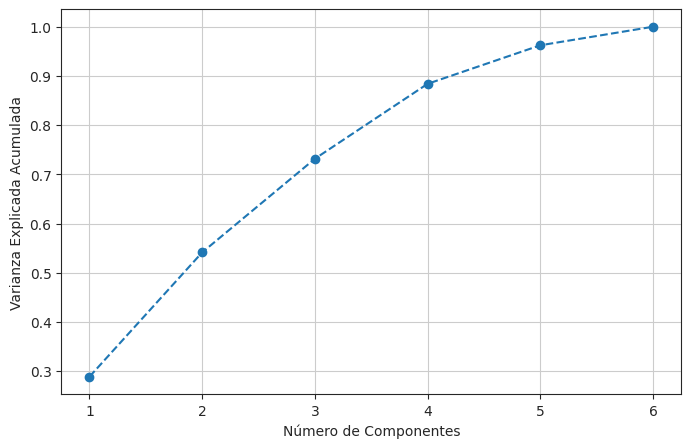

In [35]:
# Graficar la varianza explicada acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
#plt.title('Análisis de Varianza Explicada por PCA')
plt.grid(True)
plt.show()

In [36]:
# Obtener los pesos de cada variable en cada componente principal
loadings = pd.DataFrame(pca_full.components_.T,
                        columns=[f'PC{i+1}' for i in range(len(pca_full.components_))],
                        index=X_violencia.columns)

# Mostrar los loadings
print("Pesos de las variables en cada componente:")
loadings

Pesos de las variables en cada componente:


,PC1,PC2,PC3,PC4,PC5,PC6
armas_confis_polinal_tasa,0.582487,0.168271,-0.069036,-0.513712,0.406968,-0.445090
indice_criminalidad_general_tasa,0.641138,0.315204,0.111265,0.097816,-0.185897,0.658090
indice_narcotrafico_tasa,0.217834,0.216469,-0.649472,0.606946,-0.100402,-0.324672
total_reclam_rest_tierr_minagr_tasa,0.044184,0.314065,0.717848,0.488837,0.176438,-0.337660
vict_fuerza_pub_mindef_tasa,-0.221654,0.638510,0.018840,-0.344859,-0.614417,-0.215369
vict_por_declarac_uv_tasa,-0.388738,0.564925,-0.213027,-0.016117,0.617333,0.320940


<ipython-input-37-f80fc6b0f5cb>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-37-f80fc6b0f5cb>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-37-f80fc6b0f5cb>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-37-f80fc6b0f5cb>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


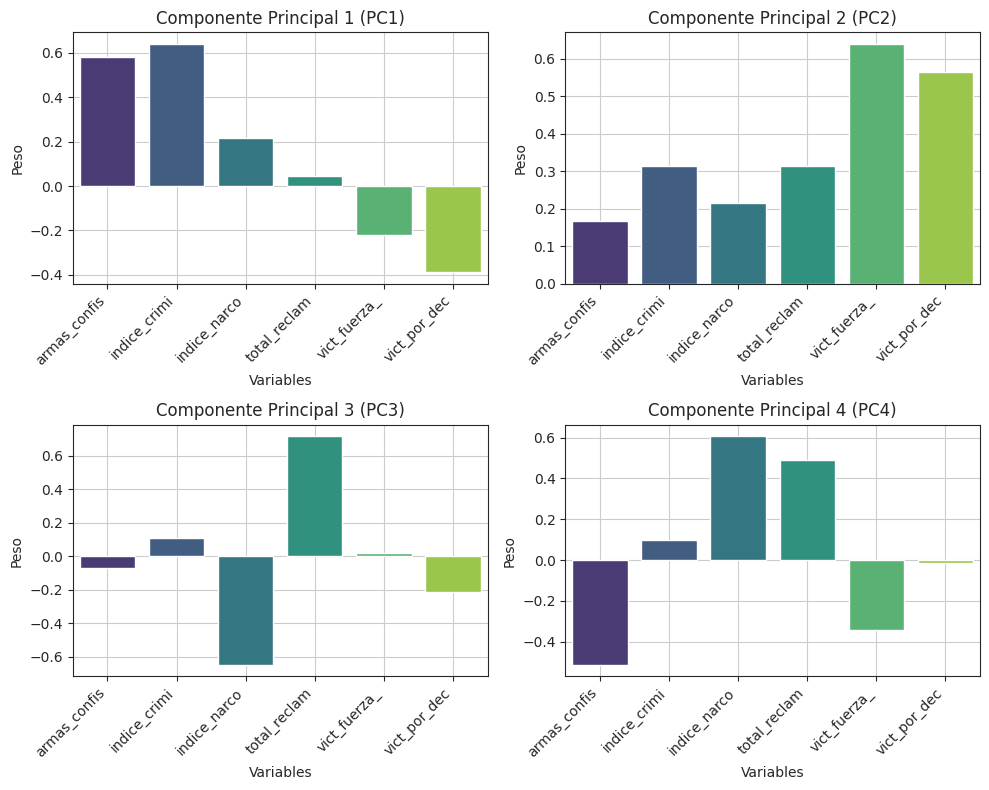

In [37]:
# Reducir el nombre de las variables a los primeros 12 caracteres
shortened_index = [col[:12] for col in loadings.index]

# Asignar los nombres abreviados al índice
loadings.index = shortened_index

# Graficar los loadings de las primeras cuatro componentes para mejor visualización
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
for i, ax in enumerate(ax.flatten()):
    sns.barplot(x=loadings.index, y=loadings[f'PC{i+1}'], ax=ax, hue=loadings.index, palette="viridis", dodge=False, legend=False)
    ax.set_title(f'Componente Principal {i+1} (PC{i+1})')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_ylabel('Peso')
    ax.set_xlabel('Variables')
    ax.grid(True)

plt.tight_layout()
plt.show()

- Análisis de sensibilidad: Número de componentes PCA y calidad de la agrupación

In [38]:
from sklearn.metrics import silhouette_score

# Definir el rango de componentes a evaluar
num_components = [2, 3, 4, 5]
num_clusters = 6  # Basado en el resultado del método del codo
best_score = -1
best_num_components = None

# Almacenar los resultados
results = {}

for n_components in num_components:
    # Aplicar PCA con el número de componentes especificado
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_violencia)

    # Ajustar el modelo K-means con el número de clusters óptimo
    kmeans_pca = KMeans(n_clusters=num_clusters, random_state=0)
    labels = kmeans_pca.fit_predict(X_pca)

    # Calcular el coeficiente de silueta
    silhouette_avg = silhouette_score(X_pca, labels)
    results[n_components] = silhouette_avg

    # Verificar si es el mejor score
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_num_components = n_components

    print(f"Número de componentes: {n_components}, Coeficiente de Silueta: {silhouette_avg:.4f}")

Número de componentes: 2, Coeficiente de Silueta: 0.4989
Número de componentes: 3, Coeficiente de Silueta: 0.3703
Número de componentes: 4, Coeficiente de Silueta: 0.3199
Número de componentes: 5, Coeficiente de Silueta: 0.2857


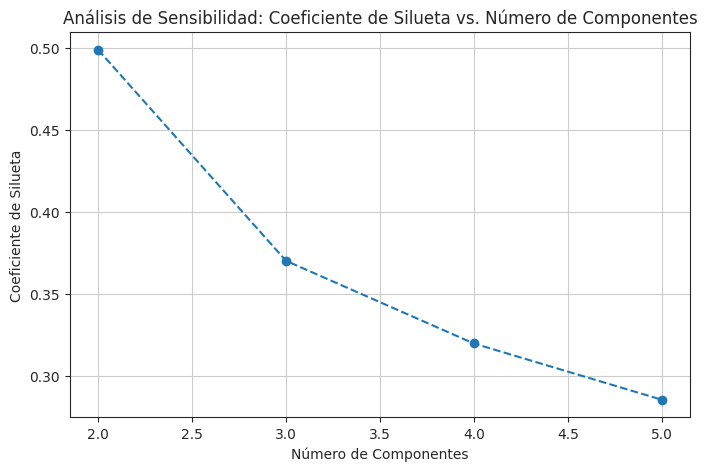

In [39]:
# Graficar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(results.keys(), results.values(), marker='o', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Coeficiente de Silueta')
plt.title('Análisis de Sensibilidad: Coeficiente de Silueta vs. Número de Componentes')
plt.grid(True)
plt.show()

- Asignar clústeres a cada municipio con la nueva configuracion refinada

In [40]:
# Reducir a las 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_violencia)

# Definir y entrenar el modelo K-means con 5 clusters
kmeans_refinado = KMeans(n_clusters=6, random_state=42)
kmeans_refinado.fit(X_pca)

# Asignar etiquetas de clusters al dataset original
df_violencia_scaled['cluster_pca'] = kmeans_refinado.labels_

# Mostrar la cantidad de municipios en cada cluster
print("Conteo de municipios por cluster:")
print(df_violencia_scaled['cluster_pca'].value_counts())

Conteo de municipios por cluster:
cluster_pca
3    13
0    10
5    10
4     5
1     3
2     1
Name: count, dtype: int64


- Lista de municipios por cluster

In [41]:
# Agrupar por 'cluster' y crear una lista de municipios en cada cluster
municipios_por_cluster = df_violencia_scaled.groupby('cluster_pca')['nombre_municipio'].agg(list)

# Calcular el conteo de municipios por cluster
conteo_municipios = df_violencia_scaled['cluster_pca'].value_counts().sort_index()

# Crear un DataFrame con los resultados
cluster_summary = pd.DataFrame({
    'municipios_en_cluster': municipios_por_cluster,
    'cantidad_municipios': conteo_municipios
})
cluster_summary

,municipios_en_cluster,cantidad_municipios
cluster_pca,,
0,"[POPAYAN, BALBOA, BUENOS AIRES, GUAPI, JAMBALO...",10
1,"[PUERTO TEJADA, ROSAS, VILLA RICA]",3
2,[ARGELIA],1
3,"[ALMAGUER, BOLIVAR, CAJIBIO, CALDONO, INZA, LA...",13
4,"[CALOTO, CORINTO, FLORENCIA, PIAMONTE, SANTA R...",5
5,"[EL TAMBO, GUACHENE, LA SIERRA, MERCADERES, MI...",10


- Matriz de centroides

In [42]:
# Nombres de las componentes principales
pca_component_names = [f'PCA_{i+1}' for i in range(2)]

# Convertir los centroides en un DataFrame con los nombres de las componentes principales
centroids_df = pd.DataFrame(kmeans_refinado.cluster_centers_, columns=pca_component_names)
print("Centroides de los clusters en el espacio de PCA:")
centroids_df

Centroides de los clusters en el espacio de PCA:


,PCA_1,PCA_2
0,-1.140383,0.302880
1,3.292396,0.551593
2,-2.647932,5.047507
3,-0.509841,-1.203523
4,0.643716,1.549609
5,0.758392,-0.183334


- Análisis descriptivo de los clusters

In [43]:
# Seleccionar solo las columnas numéricas de interés para el análisis
df_numerical = df_violencia_scaled[[* var_violencia, 'cluster_pca']]

# Calcular estadísticas descriptivas (media, mediana, desviación estándar) por cada cluster en las columnas numéricas
cluster_mean_std_pca = df_numerical.groupby('cluster_pca').agg(['mean', 'median', 'std'])
print("Media, mediana y desviación estándar de las variables numéricas por cluster:")
cluster_mean_std_pca

Media, mediana y desviación estándar de las variables numéricas por cluster:


armas_confis_polinal_tasa                      \
                                 mean    median       std   
cluster_pca                                                 
0                           -0.342837 -0.384684  0.342559   
1                            2.936795  2.175735  1.754402   
2                           -0.180710 -0.180710       NaN   
3                           -0.537347 -0.610717  0.261304   
4                           -0.218252 -0.159653  0.424315   
5                            0.287546  0.211753  0.386945   

            indice_criminalidad_general_tasa                      \
                                        mean    median       std   
cluster_pca                                                        
0                                  -0.771145 -0.719154  0.395079   
1                                   1.877412  1.930362  0.374360   
2                                  -0.255795 -0.255795       NaN   
3                                  -0.749063 -0.823411  0.335212   
4                                   1.119606  0.900455  0.449162   
5                                   0.647479  0.615929  0.651436   

            indice_narcotrafico_tasa                      \
                                mean    median       std   
cluster_pca                                                
0                           0.130923 -0.073469  0.907686   
1                           0.395424  0.110663  0.641874   
2                          -0.683383 -0.683383       NaN   
3                          -0.543739 -0.624866  0.210997   
4                           1.195697  0.080268  2.174352   
5                          -0.072199 -0.269569  0.490342   

            total_reclam_rest_tierr_minagr_tasa                      \
                                           mean    median       std   
cluster_pca                                                           
0                                     -0.280249 -0.346508  0.249567   
1                                     -0.280311 -0.585165  0.551321   
2                                      0.670029  0.670029       NaN   
3                                     -0.131640 -0.280131  0.430394   
4                                      1.379047 -0.325004  2.526646   
5                                     -0.221053 -0.346833  0.391591   

            vict_fuerza_pub_mindef_tasa                      \
                                   mean    median       std   
cluster_pca                                                   
0                             -0.027424 -0.226094  0.542938   
1                             -0.283402 -0.467221  0.318384   
2                              5.728880  5.728880       NaN   
3                             -0.396685 -0.467221  0.114749   
4                              0.478768  0.159078  0.640888   
5                             -0.184137 -0.196633  0.287500   

            vict_por_declarac_uv_tasa                      
                                 mean    median       std  
cluster_pca                                                
0                            1.205158  1.443314  0.789219  
1                           -0.621249 -0.683839  0.287845  
2                            2.545635  2.545635       NaN  
3                           -0.822519 -0.915497  0.251045  
4                            0.417383  0.359208  0.364202  
5                           -0.412763 -0.339268  0.395770

In [44]:
df_violencia_scaled.columns

Index(['armas_confis_polinal_tasa', 'indice_criminalidad_general_tasa',
       'indice_narcotrafico_tasa', 'total_reclam_rest_tierr_minagr_tasa',
       'vict_fuerza_pub_mindef_tasa', 'vict_por_declarac_uv_tasa',
       'codigo_dane', 'geometria_mpio', 'geometria_cabecera',
       'nombre_municipio', 'is_anomalous', 'cluster', 'silhouette',
       'cluster_pca'],
      dtype='object')

- Visualización de Tesselation Voroni

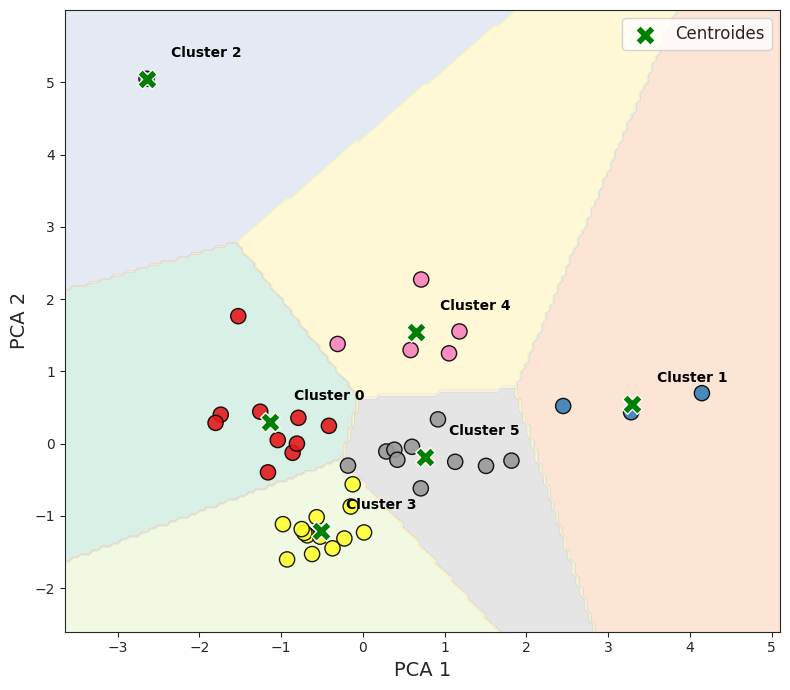

In [45]:
# Asignar componentes principales al dataframe
df_violencia_scaled['PCA_1'] = X_pca[:, 0]
df_violencia_scaled['PCA_2'] = X_pca[:, 1]

# Coordenadas PCA del dataset
X_2d = df_violencia_scaled[['PCA_1', 'PCA_2']].values
kmeans_labels = df_violencia_scaled['cluster_pca'].values
centroides = kmeans_refinado.cluster_centers_

# Generar la malla de puntos para graficar los límites de decisión
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

# Predecir el cluster para cada punto en la malla usando el modelo K-means ya entrenado
Z = kmeans_refinado.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Crear la figura
plt.figure(figsize=(8, 7))

# Graficar los límites de decisión con colores claros usando 'Pastel2'
plt.contourf(xx, yy, Z, cmap='Pastel2', alpha=0.5)

# Graficar los puntos y asignar colores según el cluster
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=kmeans_labels, cmap='Set1', edgecolor='black', s=120, alpha=0.9)

# Graficar los centroides
plt.scatter(centroides[:, 0], centroides[:, 1], s=200, c='green', edgecolor='white', marker='X', label='Centroides')

# Añadir etiquetas de clusters
for i, (x, y) in enumerate(centroides):
    plt.text(x + 0.3, y + 0.3, f'Cluster {i}', fontsize=10, color='black', fontweight='bold')

# Ajustes de visualización
plt.xlabel('PCA 1', fontsize=14)
plt.ylabel('PCA 2', fontsize=14)
#plt.title('Visualización de Clusters con Límites de Decisión de K-means', fontsize=18, fontweight='bold')
plt.legend(loc='upper right', fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()

- Gráficos de boxplot de cada variable en cada cluster

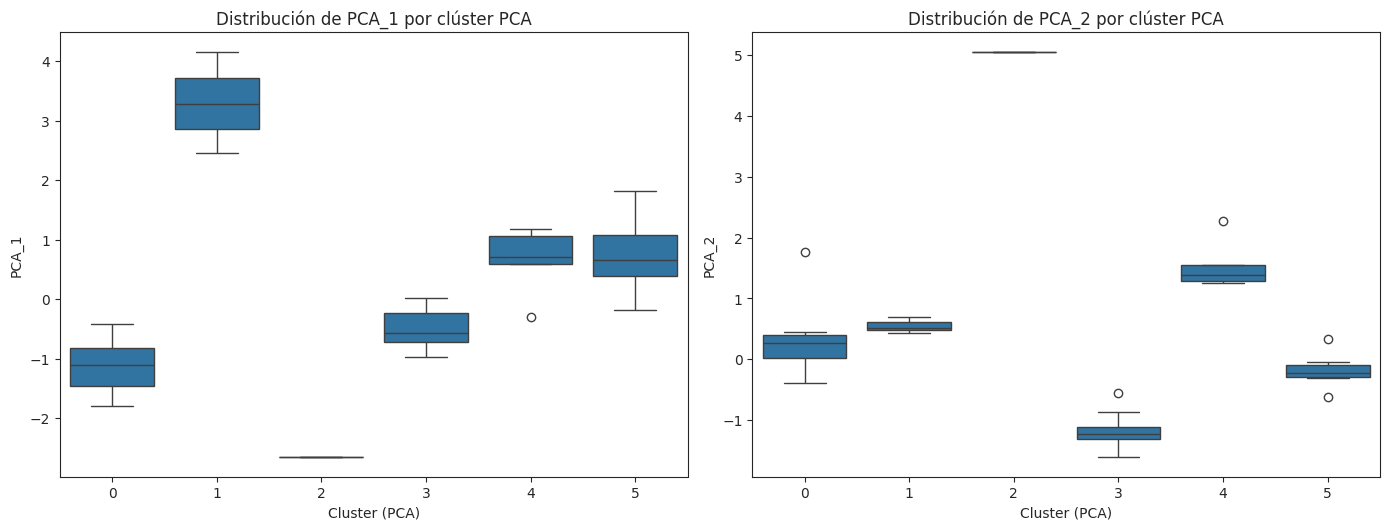

In [46]:
# Crear gráficos de boxplot para cada componente principal según el cluster refinado
plt.figure(figsize=(14, 10))
for i, component in enumerate(['PCA_1', 'PCA_2']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='cluster_pca', y=component, data=df_violencia_scaled)
    plt.xlabel("Cluster (PCA)")
    plt.ylabel(f"{component}")
    plt.title(f"Distribución de {component} por clúster PCA")
plt.tight_layout()
plt.show()

- Mapa que muestra la distribución de los municipios del Cauca según los clústeres identificados

<ipython-input-47-3adfc9767275>:25: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='upper right')


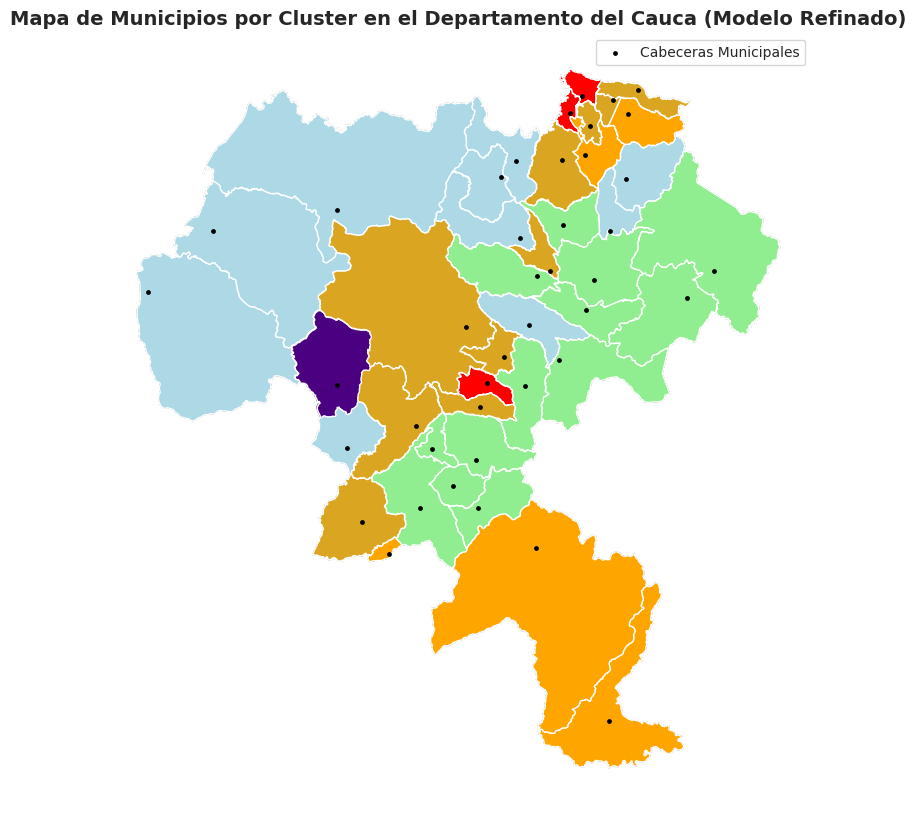

In [47]:
# Crear una copia de df_violencia_scaled
df_violencia_scaled = df_violencia_scaled.copy()

# Convertir df_violencia_scaled a un GeoDataFrame directamente
cluster_gdf = gpd.GeoDataFrame(df_violencia_scaled, geometry='geometria_mpio', crs="EPSG:4326")

# Colores para cada cluster del modelo refinado (ajusta según el número de clusters óptimo)
colors = {0: '#ADD8E6', 1: '#FF0000', 2: '#4B0082', 3: '#90EE90', 4: '#FFA500', 5: '#DAA520'}

# Graficar el mapa base del Cauca
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
geo_violencia.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=0.5, label='Municipios del Cauca')

# Graficar los municipios por cluster refinado, asignando un color distinto a cada cluster
for cluster, color in colors.items():
    cluster_gdf[cluster_gdf['cluster_pca'] == cluster].plot(
        ax=ax, color=color, markersize=100, label=f'Cluster {cluster}', zorder=5
    )

# Añadir cabeceras municipales
geo_violencia.set_geometry('geometria_cabecera').plot(ax=ax, color='black', markersize=6, label='Cabeceras Municipales', zorder=6)

# Añadir título y leyenda
plt.title("Mapa de Municipios por Cluster en el Departamento del Cauca (Modelo Refinado)", fontsize=14, weight='bold')
plt.legend(loc='upper right')
plt.axis('off')
plt.show()

- Evaluación de la calidad de la clusterización con configuracion refinada

In [48]:
df_violencia_scaled.columns

Index(['armas_confis_polinal_tasa', 'indice_criminalidad_general_tasa',
       'indice_narcotrafico_tasa', 'total_reclam_rest_tierr_minagr_tasa',
       'vict_fuerza_pub_mindef_tasa', 'vict_por_declarac_uv_tasa',
       'codigo_dane', 'geometria_mpio', 'geometria_cabecera',
       'nombre_municipio', 'is_anomalous', 'cluster', 'silhouette',
       'cluster_pca', 'PCA_1', 'PCA_2'],
      dtype='object')

In [49]:
# Calcular el coeficiente de silueta para cada punto en el modelo refinado
silhouette_vals = silhouette_samples(X_pca, kmeans_refinado.labels_)

# Añadir el coeficiente de silueta al DataFrame
df_violencia_scaled['silhouette_pca'] = silhouette_vals

# Calcular los coeficientes de silueta promedio por cluster y promedio general
silhouette_by_cluster = df_violencia_scaled.groupby('cluster_pca')['silhouette_pca'].mean()

# Calcular el coeficiente de silueta promedio por cada componente principal
# para cada componente por separado
silho_by_var = []
for i in range(X_pca.shape[1]):
    silho_by_var.append(silhouette_samples(X_pca[:, [i]], kmeans_refinado.labels_).mean())

silhouette_avg = silhouette_score(X_pca, kmeans_refinado.labels_)

# Imprimir los resultados
print(f"Coeficiente de Silueta promedio por cluster:\n{silhouette_by_cluster}")
print(f"\nCoeficiente de Silueta promedio por componente principal:\n{silho_by_var}")
print(f"\nCoeficiente de Silueta promedio para el modelo refinado: {silhouette_avg:.3f}")
print(f"Inercia del modelo refinado: {kmeans_refinado.inertia_:.3f}")

Coeficiente de Silueta promedio por cluster:
cluster_pca
0    0.429772
1    0.537898
2    0.000000
3    0.641535
4    0.456541
5    0.441778
Name: silhouette_pca, dtype: float64

Coeficiente de Silueta promedio por componente principal:
[0.09630547605545978, 0.29052090927275265]

Coeficiente de Silueta promedio para el modelo refinado: 0.499
Inercia del modelo refinado: 14.227


- Visualización de los indicadores de desempeño

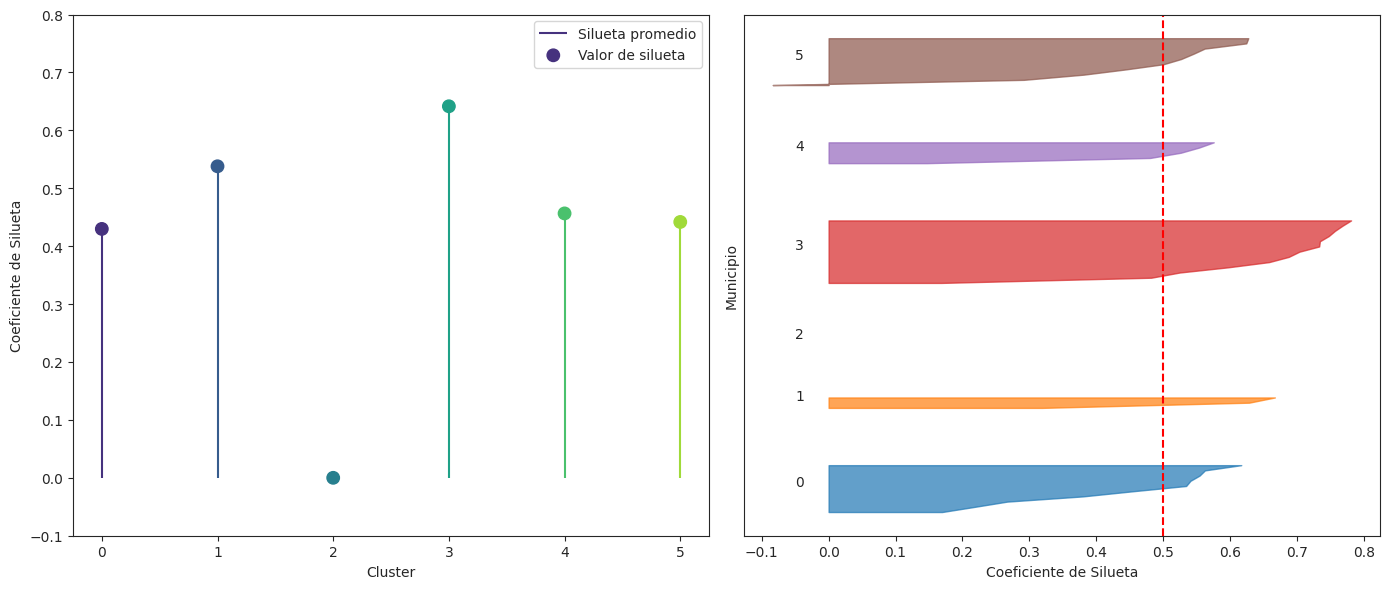

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Colores personalizados para los gráficos
palette_cluster = sns.color_palette("viridis", len(silhouette_by_cluster))

# Gráfico 1: Silueta promedio por cluster (lollipop)
ax[0].vlines(silhouette_by_cluster.index, 0, silhouette_by_cluster.values, color=palette_cluster, linestyle='-', label='Silueta promedio')
ax[0].scatter(silhouette_by_cluster.index, silhouette_by_cluster.values, color=palette_cluster, s=80, zorder=5, label='Valor de silueta')
ax[0].set_xlabel("Cluster")
ax[0].set_ylabel("Coeficiente de Silueta")
ax[0].set_ylim(-0.1, 0.8)
ax[0].legend()

# Gráfico 2: Gráfico de silueta detallado
y_lower = 10
for i in range(kmeans_refinado.n_clusters):
    # Obtener los valores de silueta para el cluster i
    ith_cluster_silhouette_vals = silhouette_vals[kmeans_refinado.labels_ == i]
    ith_cluster_silhouette_vals.sort()

    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    color = f'C{i}'
    ax[1].fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_vals,
                        facecolor=color, edgecolor=color, alpha=0.7)

    ax[1].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax[1].set_xlabel("Coeficiente de Silueta")
ax[1].set_ylabel("Municipio")
ax[1].axvline(x=silhouette_avg, color="red", linestyle="--")
ax[1].set_yticks([])
ax[1].set_xticks([-0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

plt.tight_layout()
plt.show()

###- Clustrizacion sin anomalías, con PCA y usando la técnica del codo para optimizar la cantidad de grupos

- Técnica del codo

In [71]:
# Calcular el PCA excluyendo las anomalías y verificar la varianza explicada
X_sin_anomalos = df_violencia_scaled[df_violencia_scaled['is_anomalous'] == 0][var_violencia]

# Aplicar PCA
pca_excl_anomalos = PCA(n_components=2)
X_pca_excl_anomalos = pca_excl_anomalos.fit_transform(X_sin_anomalos)

# Verificar la varianza explicada por cada componente principal
varianza_explicada = pca_excl_anomalos.explained_variance_ratio_
print(f"Varianza expl. por el PCA: {(varianza_explicada).round(3)}")
print(f"Varianza total explicada (suma): {sum(varianza_explicada):.3f}")

# Extraer y mostrar los pesos de las variables en las componentes principales
# Truncar los nombres de las variables a 20 caracteres
nombres_truncados = [var[:20] for var in var_violencia]

pesos_variables = pd.DataFrame(
    pca_excl_anomalos.components_.T,
    columns=['PCA_1', 'PCA_2'],
    index=nombres_truncados
)

# Redondear los valores de los pesos a 3 decimales
pesos_variables = pesos_variables.round(3)

print("\nPesos de las variables en los PCA:")
print(pesos_variables)


Varianza expl. por el PCA: [0.364 0.297]
Varianza total explicada (suma): 0.661

Pesos de las variables en los PCA:
                      PCA_1  PCA_2
armas_confis_polinal  0.344 -0.215
indice_criminalidad_  0.703 -0.346
indice_narcotrafico_  0.617  0.527
total_reclam_rest_ti  0.011 -0.169
vict_fuerza_pub_mind  0.080  0.124
vict_por_declarac_uv -0.022  0.716


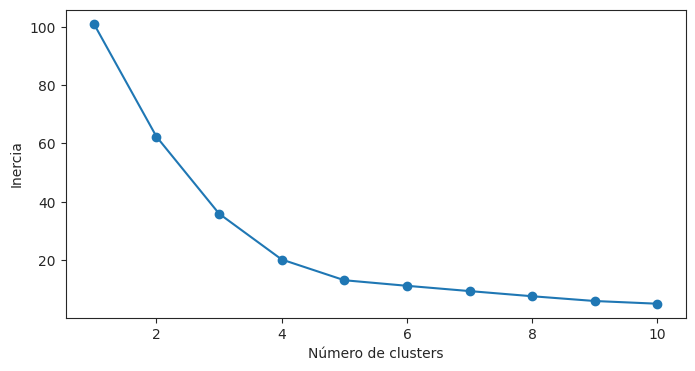

In [52]:
# Determinar el número óptimo de clusters usando el método del codo sobre las componentes PCA
inertias_pca_excl_anomalos = []

for k in range(1, 11):
    kmeans_pca_excl_anomalos = KMeans(n_clusters=k, random_state=42)
    kmeans_pca_excl_anomalos.fit(X_pca_excl_anomalos)
    inertias_pca_excl_anomalos.append(kmeans_pca_excl_anomalos.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertias_pca_excl_anomalos, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
#plt.title('Método del codo (excluyendo anomalías y usando PCA)')
plt.show()

In [53]:
# Aplicar K-means con el número óptimo de clusters y asignar etiquetas de cluster
n_clusters_opt_pca_excl_anomalos = 4

kmeans_final_pca_excl_anomalos = KMeans(n_clusters=n_clusters_opt_pca_excl_anomalos, random_state=42)
kmeans_final_pca_excl_anomalos.fit(X_pca_excl_anomalos)

# Asignar etiquetas de cluster al DataFrame sin anomalías
df_violencia_scaled_excl_anomalos = df_violencia_scaled[df_violencia_scaled['is_anomalous'] == 0].copy()
df_violencia_scaled_excl_anomalos['cluster_pca_final'] = kmeans_final_pca_excl_anomalos.labels_

# Evaluar el modelo
silhouette_avg_pca_excl_anomalos = silhouette_score(X_pca_excl_anomalos, kmeans_final_pca_excl_anomalos.labels_)
print(f"Coeficiente de Silueta para el modelo con PCA (excluyendo anomalías): {silhouette_avg_pca_excl_anomalos:.3f}")
print(f"Inercia del modelo refinado (con PCA y sin anomalías): {kmeans_final_pca_excl_anomalos.inertia_:.3f}")

Coeficiente de Silueta para el modelo con PCA (excluyendo anomalías): 0.520
Inercia del modelo refinado (con PCA y sin anomalías): 20.190


In [54]:
# Crear un nuevo DataFrame con municipios y el cluster asignado
df_clusters = df_violencia_scaled_excl_anomalos[['nombre_municipio', 'cluster_pca_final']].copy()

# Agrupar por cluster y crear una lista de municipios para cada cluster
resumen_clusters = df_clusters.groupby('cluster_pca_final')['nombre_municipio'].agg(
    municipios=lambda x: list(x),
    numero_municipios='count'
).reset_index()

# Obtener los municipios anómalos
municipios_anomalos = df_violencia_scaled[df_violencia_scaled['is_anomalous'] == 1]['nombre_municipio'].tolist()
numero_municipios_anomalos = len(municipios_anomalos)

# Crear una nueva fila con los datos de los municipios anómalos
fila_anomalos = {
    'cluster_pca_final': 'Anómalos',
    'municipios': municipios_anomalos,
    'numero_municipios': numero_municipios_anomalos
}

# Adicionar la fila al DataFrame resumen_clusters
resumen_clusters = pd.concat([resumen_clusters, pd.DataFrame([fila_anomalos])], ignore_index=True)
resumen_clusters

,cluster_pca_final,municipios,numero_municipios
0,0,"[POPAYAN, GUAPI, JAMBALO, LOPEZ DE MICAY, SUAR...",7
1,1,"[ALMAGUER, BALBOA, BOLIVAR, BUENOS AIRES, CAJI...",17
2,2,"[CALOTO, CORINTO]",2
3,3,"[FLORENCIA, GUACHENE, LA SIERRA, MERCADERES, M...",13
4,Anómalos,"[ARGELIA, PUERTO TEJADA, SANTA ROSA]",3


- Mapa que muestra la distribución de los municipios del Cauca según los clústeres identificados

In [55]:
# Crear una nueva columna 'cluster_pca_exc_anom' en df_violencia_scaled
df_violencia_scaled['cluster_pca_exc_anom'] = 'Anomalo'  # Inicialmente marcar todos como "Anómalos"

# Asignar los clusters generados en df_violencia_scaled_excl_anomalos a los municipios no anómalos en df_violencia_scaled
df_violencia_scaled.loc[
    df_violencia_scaled['is_anomalous'] == 0, 'cluster_pca_exc_anom'
] = df_violencia_scaled_excl_anomalos['cluster_pca_final'].values

# Confirmar la asignación
df_violencia_scaled['cluster_pca_exc_anom'].value_counts()

# Colores para cada cluster del modelo refinado (ajusta según el número de clusters óptimo)
colors = {0: '#ADD8E6', 1: '#FF0000', 2: '#4B0082', 3: '#90EE90', 4: '#FFA500', 5: '#DAA520'}


<ipython-input-56-4233e3d0274e>:28: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='upper right')


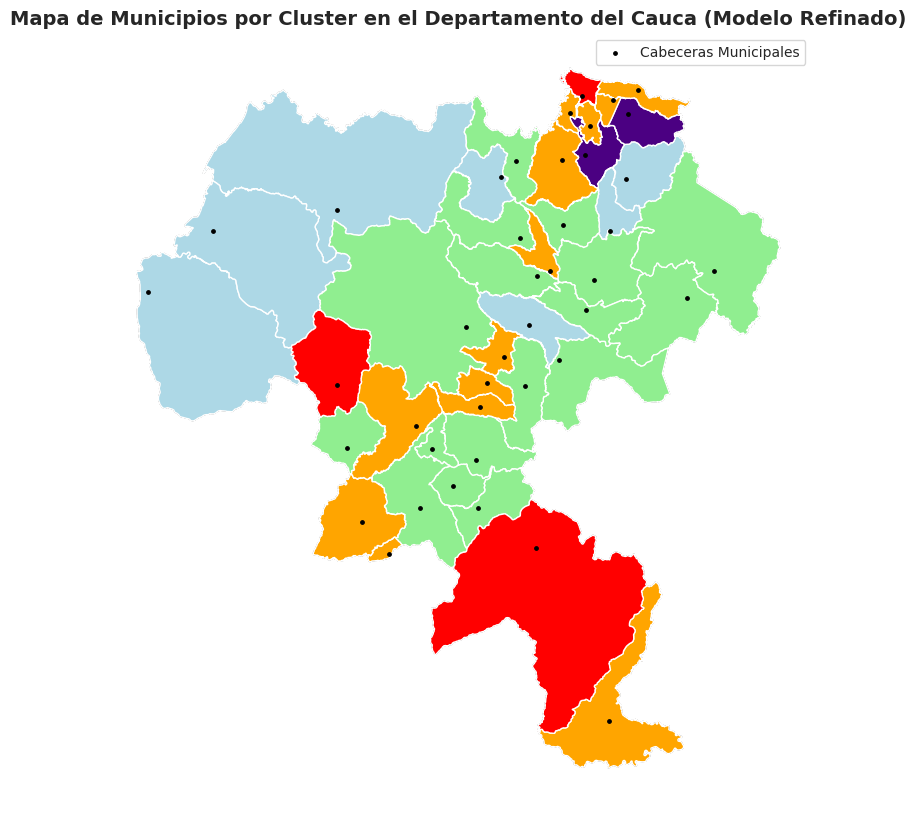

In [56]:
# Crear una copia de df_violencia_scaled
df_violencia_scaled = df_violencia_scaled.copy()

# Convertir df_violencia_scaled a un GeoDataFrame directamente
cluster_gdf = gpd.GeoDataFrame(df_violencia_scaled, geometry='geometria_mpio', crs="EPSG:4326")

# Filtrar las geometrías no válidas si las hubiera
cluster_gdf = cluster_gdf[cluster_gdf.is_valid]

# Colores para cada cluster del modelo refinado, incluyendo una entrada para "Anómalos"
colors = {0: '#ADD8E6', 1: '#90EE90', 2: '#4B0082', 3: '#FFA500', 'Anomalo': '#FF0000'}

# Graficar el mapa base del Cauca
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
geo_violencia.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=0.5, label='Municipios del Cauca')

# Graficar los municipios por cluster refinado, asignando un color distinto a cada cluster
for cluster, color in colors.items():
    cluster_gdf[cluster_gdf['cluster_pca_exc_anom'] == cluster].plot(
        ax=ax, color=color, markersize=100, label=f'Cluster {cluster}', zorder=5, aspect=1
    )

# Añadir cabeceras municipales
geo_violencia.set_geometry('geometria_cabecera').plot(ax=ax, color='black', markersize=6, label='Cabeceras Municipales', zorder=6)

# Añadir título y leyenda
plt.title("Mapa de Municipios por Cluster en el Departamento del Cauca (Modelo Refinado)", fontsize=14, weight='bold')
plt.legend(loc='upper right')
plt.axis('off')
plt.show()


- Matriz de centroides

In [72]:
# Nombres de las componentes principales
pca_component_names = [f'PCA_{i+1}' for i in range(2)]

# Convertir los centroides en un DataFrame con los nombres de las componentes principales
centroids_df = pd.DataFrame(kmeans_final_pca_excl_anomalos.cluster_centers_, columns=pca_component_names)

# Lista de perfiles de violencia correspondiente a cada cluster
perfiles_violencia = [
    'Vulnerabilidad por conflicto',
    'Baja violencia y estabilidad',
    'Narcotráfico, violen., vict.',
    'Criminalidad activa y violen'
]

# Agregar los perfiles de violencia como una nueva columna en el DataFrame
centroids_df['Perfil de Violencia'] = perfiles_violencia

# Redondear los valores numéricos de las componentes principales a 3 decimales
centroids_df[pca_component_names] = centroids_df[pca_component_names].round(3)

# Imprimir el DataFrame
#print("Centroides de los clusters en el espacio de PCA con perfiles de violencia:")
print(centroids_df)


   PCA_1  PCA_2           Perfil de Violencia
0 -0.431  1.778  Vulnerabilidad por conflicto
1 -0.903 -0.421  Baja violencia y estabilidad
2  2.639  1.884  Narcotráfico, violen., vict.
3  1.007 -0.697  Criminalidad activa y violen


- Análisis descriptivo de los clusters

In [58]:
# Seleccionar solo las columnas numéricas de interés para el análisis
df_numerical = df_violencia_scaled[[* var_violencia, 'cluster_pca_exc_anom']]

# Calcular estadísticas descriptivas (media, mediana, desviación estándar) por cada cluster en las columnas numéricas
cluster_mean_std_pca = df_numerical.groupby('cluster_pca_exc_anom').agg(['mean', 'median', 'std'])
print("Media, mediana y desviación estándar de las variables numéricas por cluster:")
cluster_mean_std_pca

Media, mediana y desviación estándar de las variables numéricas por cluster:


armas_confis_polinal_tasa                      \
                                          mean    median       std   
cluster_pca_exc_anom                                                 
0                                    -0.323210 -0.450758  0.408183   
1                                    -0.473061 -0.565235  0.282970   
2                                    -0.315800 -0.315800  0.220825   
3                                     0.531661  0.233760  0.721574   
Anomalo                               1.341502 -0.180710  3.131596   

                     indice_criminalidad_general_tasa                      \
                                                 mean    median       std   
cluster_pca_exc_anom                                                        
0                                           -0.880171 -0.766216  0.311638   
1                                           -0.689530 -0.728864  0.361774   
2                                            0.794278  0.794278  0.020163   
3                                            1.017400  0.900455  0.673401   
Anomalo                                      1.022816  1.479397  1.122285   

                     indice_narcotrafico_tasa                      \
                                         mean    median       std   
cluster_pca_exc_anom                                                
0                                    0.416275 -0.005639  0.955594   
1                                   -0.546497 -0.617136  0.189716   
2                                    3.359069  3.359069  1.737208   
3                                    0.029511 -0.054804  0.544406   
Anomalo                             -0.241755 -0.152546  0.404470   

                     total_reclam_rest_tierr_minagr_tasa                      \
                                                    mean    median       std   
cluster_pca_exc_anom                                                           
0                                              -0.398457 -0.378001  0.150278   
1                                              -0.066394 -0.195338  0.420371   
2                                              -0.394328 -0.394328  0.098039   
3                                              -0.024700 -0.437217  1.012416   
Anomalo                                         1.675881  0.670029  2.897990   

                     vict_fuerza_pub_mindef_tasa                      \
                                            mean    median       std   
cluster_pca_exc_anom                                                   
0                                      -0.109861 -0.364524  0.618522   
1                                      -0.280842 -0.362945  0.268804   
2                                       0.473048  0.473048  0.595983   
3                                      -0.085256 -0.224290  0.531289   
Anomalo                                 1.901854  0.084236  3.315689   

                     vict_por_declarac_uv_tasa                      
                                          mean    median       std  
cluster_pca_exc_anom                                                
0                                     1.609211  1.648172  0.535676  
1                                    -0.600058 -0.830593  0.487247  
2                                     0.300809  0.300809  0.082589  
3                                    -0.306212 -0.330510  0.513980  
Anomalo                               0.771883  0.642662  1.712801

- Visualización de Tesselation Voroni

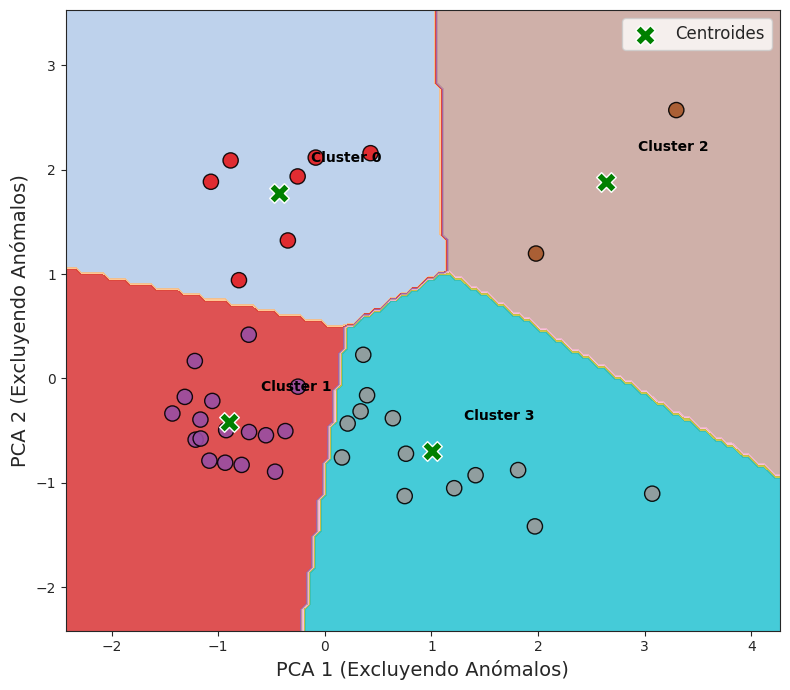

In [59]:
# Asignar nuevas componentes principales al DataFrame sin anómalos
df_violencia_scaled_excl_anomalos['PCA_1_excl'] = X_pca_excl_anomalos[:, 0]
df_violencia_scaled_excl_anomalos['PCA_2_excl'] = X_pca_excl_anomalos[:, 1]

# Coordenadas PCA del dataset sin anómalos
X_2d_excl = df_violencia_scaled_excl_anomalos[['PCA_1_excl', 'PCA_2_excl']].values
kmeans_labels_excl = df_violencia_scaled_excl_anomalos['cluster_pca_final'].values
centroides_excl = kmeans_final_pca_excl_anomalos.cluster_centers_

# Generar la malla de puntos para graficar los límites de decisión
x_min, x_max = X_2d_excl[:, 0].min() - 1, X_2d_excl[:, 0].max() + 1
y_min, y_max = X_2d_excl[:, 1].min() - 1, X_2d_excl[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

# Predecir el cluster para cada punto en la malla usando el modelo K-means sin anómalos
Z_excl = kmeans_final_pca_excl_anomalos.predict(np.c_[xx.ravel(), yy.ravel()])
Z_excl = Z_excl.reshape(xx.shape)

# Crear la figura
plt.figure(figsize=(8, 7))

# Graficar los límites de decisión con colores más vibrantes y mayor opacidad
plt.contourf(xx, yy, Z_excl, cmap='tab20', alpha=0.8)

# Graficar los puntos y asignar colores según el cluster
plt.scatter(X_2d_excl[:, 0], X_2d_excl[:, 1], c=kmeans_labels_excl, cmap='Set1', edgecolor='black', s=120, alpha=0.9)

# Graficar los centroides
plt.scatter(centroides_excl[:, 0], centroides_excl[:, 1], s=200, c='green', edgecolor='white', marker='X', label='Centroides')

# Añadir etiquetas de clusters
for i, (x, y) in enumerate(centroides_excl):
    plt.text(x + 0.3, y + 0.3, f'Cluster {i}', fontsize=10, color='black', fontweight='bold')

# Ajustes de visualización
plt.xlabel('PCA 1 (Excluyendo Anómalos)', fontsize=14)
plt.ylabel('PCA 2 (Excluyendo Anómalos)', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()

In [60]:
df_violencia_scaled.columns

Index(['armas_confis_polinal_tasa', 'indice_criminalidad_general_tasa',
       'indice_narcotrafico_tasa', 'total_reclam_rest_tierr_minagr_tasa',
       'vict_fuerza_pub_mindef_tasa', 'vict_por_declarac_uv_tasa',
       'codigo_dane', 'geometria_mpio', 'geometria_cabecera',
       'nombre_municipio', 'is_anomalous', 'cluster', 'silhouette',
       'cluster_pca', 'PCA_1', 'PCA_2', 'silhouette_pca',
       'cluster_pca_exc_anom'],
      dtype='object')

In [61]:
# Guardar resultados del modelado violencia en drive
df_violencia_scaled.to_csv('/content/drive/MyDrive/analytics_data_proyect/CSV_finales/resultados_kmeans_violencia.csv', index=False)

In [62]:
import itertools

# ANALISIS DE SENSIBILIDAD DE NUMERO DE VARIABLES DE VIOLENCIA

# Generar todas las combinaciones de 4 variables de las 6 en var_violencia
combinaciones_variables = list(itertools.combinations(var_violencia, 4))

# Lista para almacenar los resultados
resultados_sensibilidad = []

# Excluir los municipios anómalos
df_sin_anomalos = df_violencia_scaled.copy()

# Iterar sobre cada combinación de variables
for variables in combinaciones_variables:
    # Seleccionar las 4 variables de la combinación actual
    X_sin_anomalos = df_sin_anomalos[list(variables)]

    # Aplicar PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_sin_anomalos)

    # Aplicar K-means con el número óptimo de clusters (4 en este caso)
    kmeans = KMeans(n_clusters=4, random_state=42)
    kmeans.fit(X_pca)

    # Calcular el coeficiente de silueta
    silhouette_avg = silhouette_score(X_pca, kmeans.labels_)

    # Guardar los resultados
    resultados_sensibilidad.append({
        'variables': variables,
        'coef_silueta': silhouette_avg
    })

# Convertir los resultados en un DataFrame
df_resultados = pd.DataFrame(resultados_sensibilidad)

# Ordenar por el coeficiente de silueta de forma descendente
df_resultados_ordenados = df_resultados.sort_values(by='coef_silueta', ascending=False)

# Mostrar las mejores combinaciones
print("Mejores combinaciones de variables según el coeficiente de silueta:")
df_resultados_ordenados


Mejores combinaciones de variables según el coeficiente de silueta:


,variables,coef_silueta
7,"(armas_confis_polinal_tasa, indice_narcotrafic...",0.546823
14,"(indice_narcotrafico_tasa, total_reclam_rest_t...",0.535777
3,"(armas_confis_polinal_tasa, indice_criminalida...",0.521497
2,"(armas_confis_polinal_tasa, indice_criminalida...",0.506501
1,"(armas_confis_polinal_tasa, indice_criminalida...",0.494241
11,"(indice_criminalidad_general_tasa, indice_narc...",0.465108
12,"(indice_criminalidad_general_tasa, indice_narc...",0.455881
13,"(indice_criminalidad_general_tasa, total_recla...",0.435042
10,"(indice_criminalidad_general_tasa, indice_narc...",0.429698
8,"(armas_confis_polinal_tasa, indice_narcotrafic...",0.421901
